# 02 DurationMatching : 01 Deterministic : ALL

---
## 0. Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-colorblind')
plt.style.use('seaborn-whitegrid')

import seaborn as sns

import sys
sys.path.append('../../RLPack')

import importlib
import itertools

---
## 1. Environment

In [2]:
import Env_DM
importlib.reload(Env_DM)

yield_curve = np.arange(11).reshape(-1, 1)/100 * np.ones(10).reshape(1, -1)
liability_CF = np.zeros(10)
liability_CF[-1] += -10

env = Env_DM.Environment(yield_curve, liability_CF)

In [3]:
# test
if False:
    yield_curve = np.arange(10).reshape(-1, 1)/100 * np.ones(10).reshape(1, -1)
    liability_CF = np.zeros(10)
    liability_CF[-1] += -10

    env = Environment(yield_curve, liability_CF, 2)
    for i in range(10):
        #print(env.state())
        print(env.step(np.array([1])))
        

if False:
    yield_curve = np.arange(10).reshape(-1, 1)/100 * np.ones(10).reshape(1, -1)
    liability_CF = np.zeros(10)
    liability_CF[-1] += -10

    env = Environment(yield_curve, liability_CF, 2)
    env.gen_yield_curve(start=0.01, end=0.1, vol=0.5)
    print(env.yield_curve)

---
## 2. Deterministic

In [4]:
env = Env_DM.Environment(yield_curve, liability_CF, n_agents=64, reset_cash=False)

n_trials = 5
n_steps = 10000

df = pd.DataFrame()

/home/deepstation/.pyenv/versions/anaconda3-5.0.1/envs/ForChainer/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
W1029 09:39:22.201423 140549093623616 deprecation_wrapper.py:119] From /home/deepstation/.pyenv/versions/anaconda3-5.0.1/envs/ForChainer/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1029 09:39:22.202210 140549093623616 deprecation_wrapper.py:119] From /home/deepstation/.pyenv/versions/anaconda3-5.0.1/envs/ForChainer/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1029 09:39:22.205955 

lr=0.001, eps=0.5, boltzmann=False
start testing... :  2019-10-29 09:39:22.354649
start trial 1/5 trial...


W1029 09:39:22.703188 140549093623616 deprecation_wrapper.py:119] From /home/deepstation/.pyenv/versions/anaconda3-5.0.1/envs/ForChainer/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

  0%|          | 0/10000 [00:00<?, ?it/s]

start trial 2/5 trial...


  0%|          | 0/10000 [00:00<?, ?it/s]

start trial 3/5 trial...


100%|██████████| 10000/10000 [01:18<00:00, 122.02it/s]


start trial 4/5 trial...


100%|██████████| 10000/10000 [01:21<00:00, 115.77it/s]


start trial 5/5 trial...


100%|██████████| 10000/10000 [01:24<00:00, 118.23it/s]


end testing... :  2019-10-29 09:45:58.604468
loss and reward history


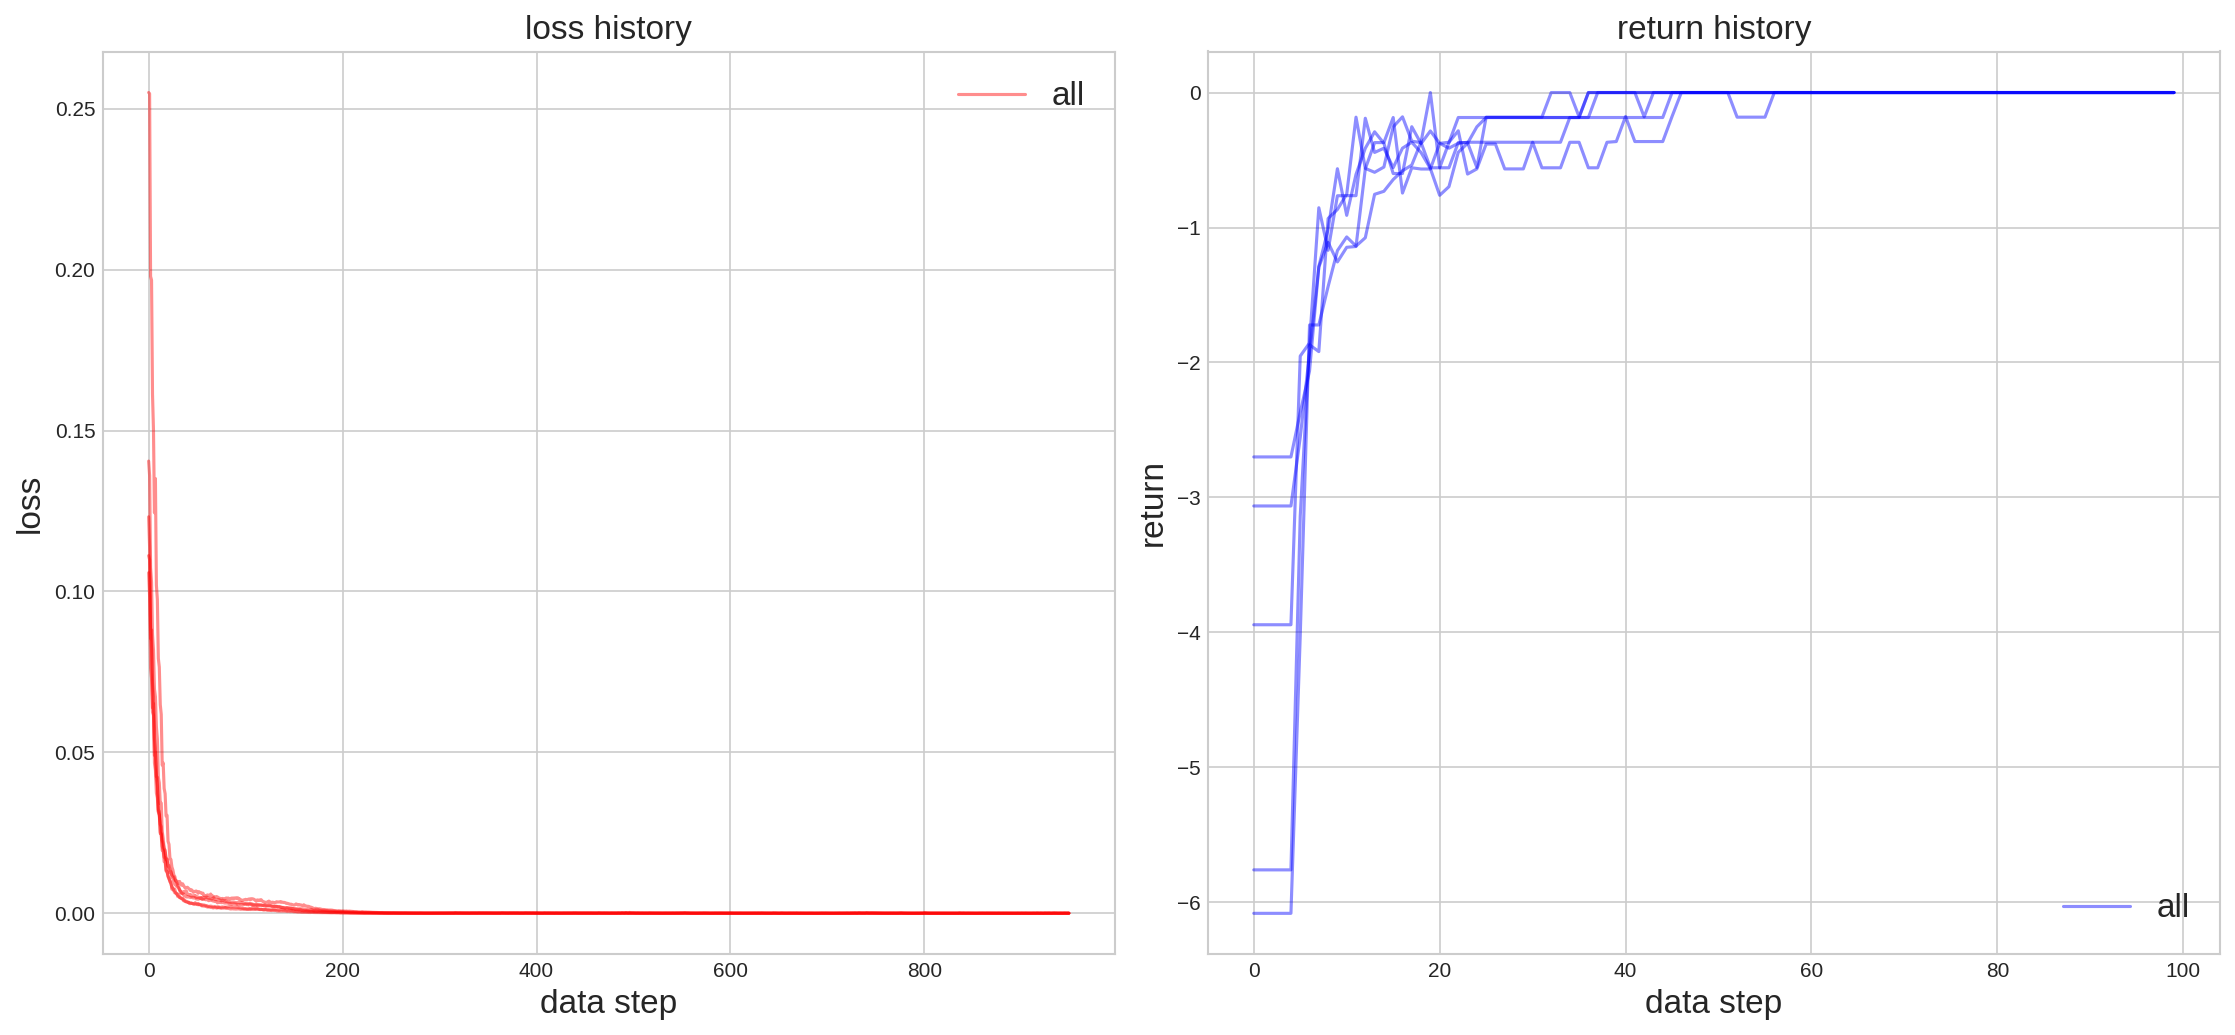

acquired action
action =  [10 10 10 10 10 10 10 10 10 10]
action =  [9 9 9 9 9 9 9 9 9 9]
action =  [8 8 8 8 8 8 8 8 8 8]
action =  [7 7 7 7 7 7 7 7 7 7]
action =  [6 6 6 6 6 6 6 6 6 6]
action =  [5 5 5 5 5 5 5 5 5 5]
action =  [4 4 4 4 4 4 4 4 4 4]
action =  [3 3 3 3 3 3 3 3 3 3]
action =  [2 2 2 2 2 2 2 2 2 2]
action =  [1 1 1 1 1 1 1 1 1 1]
return [-2.487e-14 -2.487e-14 -2.487e-14 -2.487e-14 -2.487e-14 -2.487e-14
 -2.487e-14 -2.487e-14 -2.487e-14 -2.487e-14]
param distribution in model


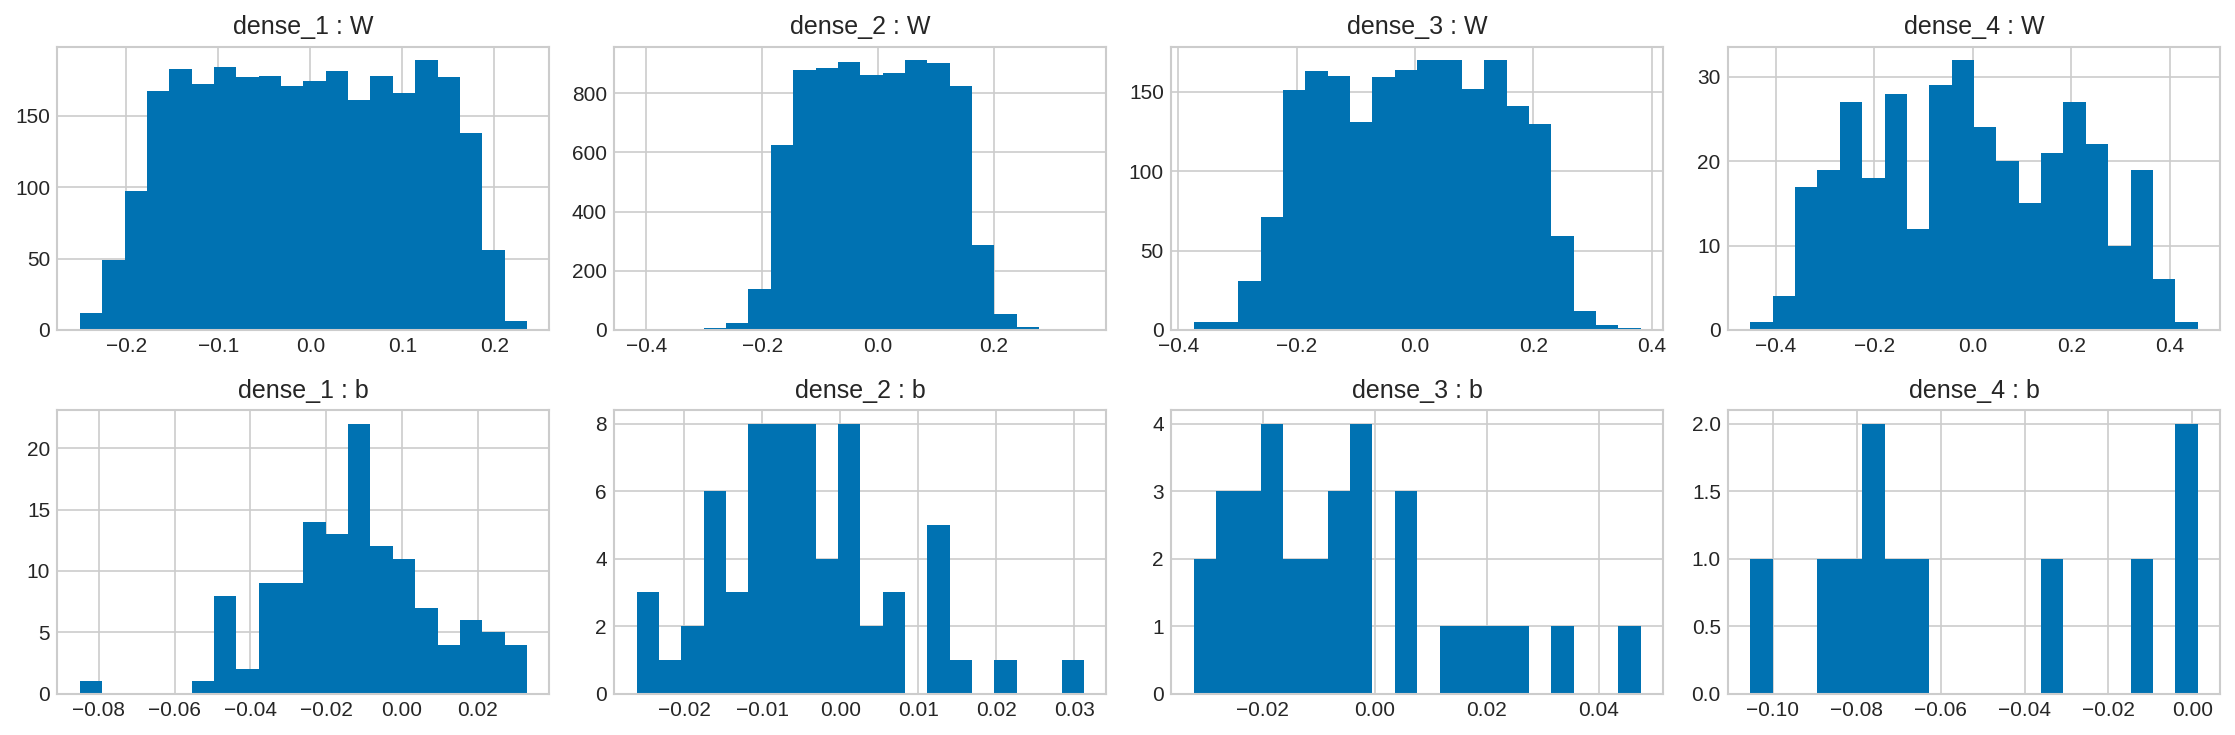

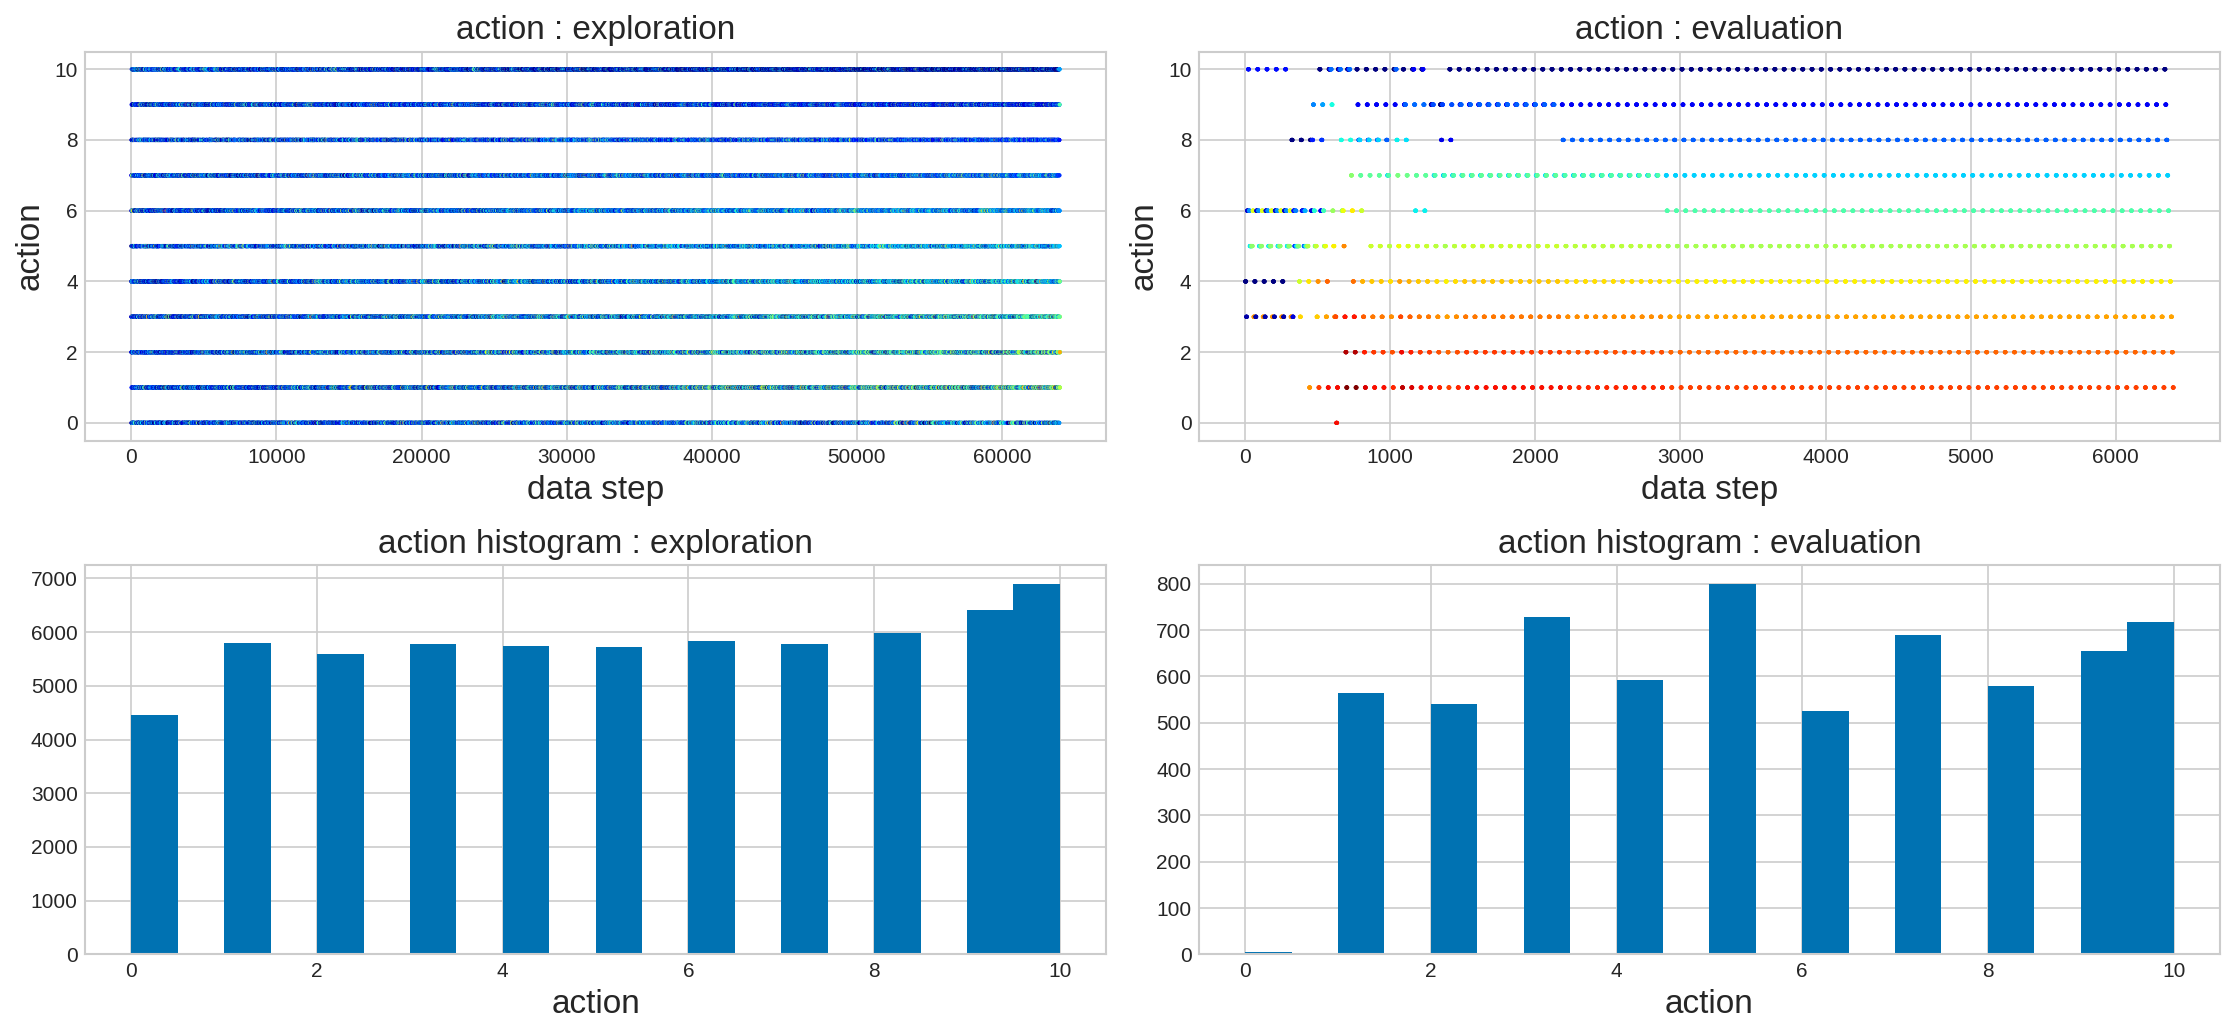

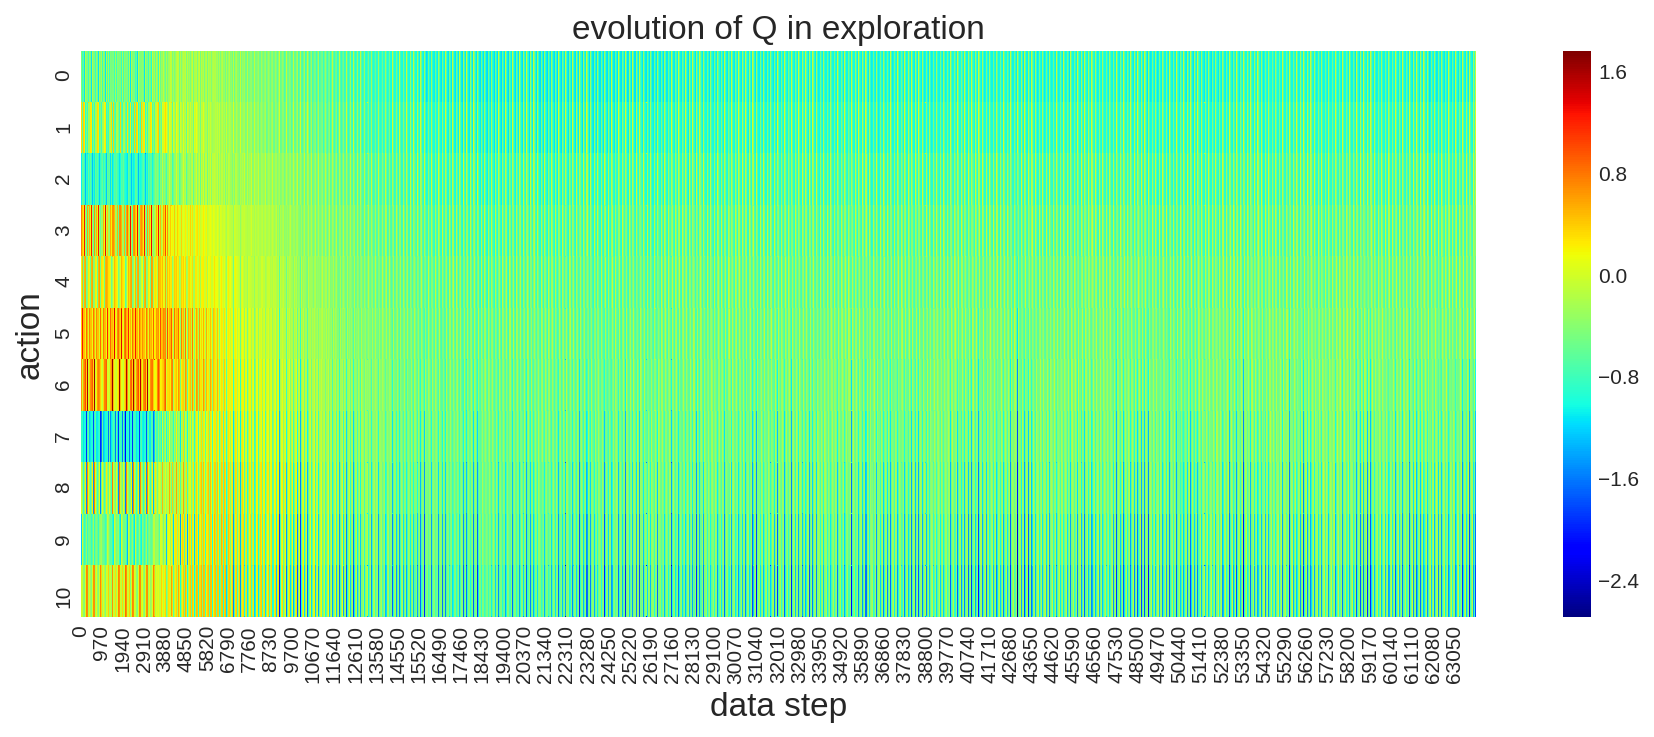

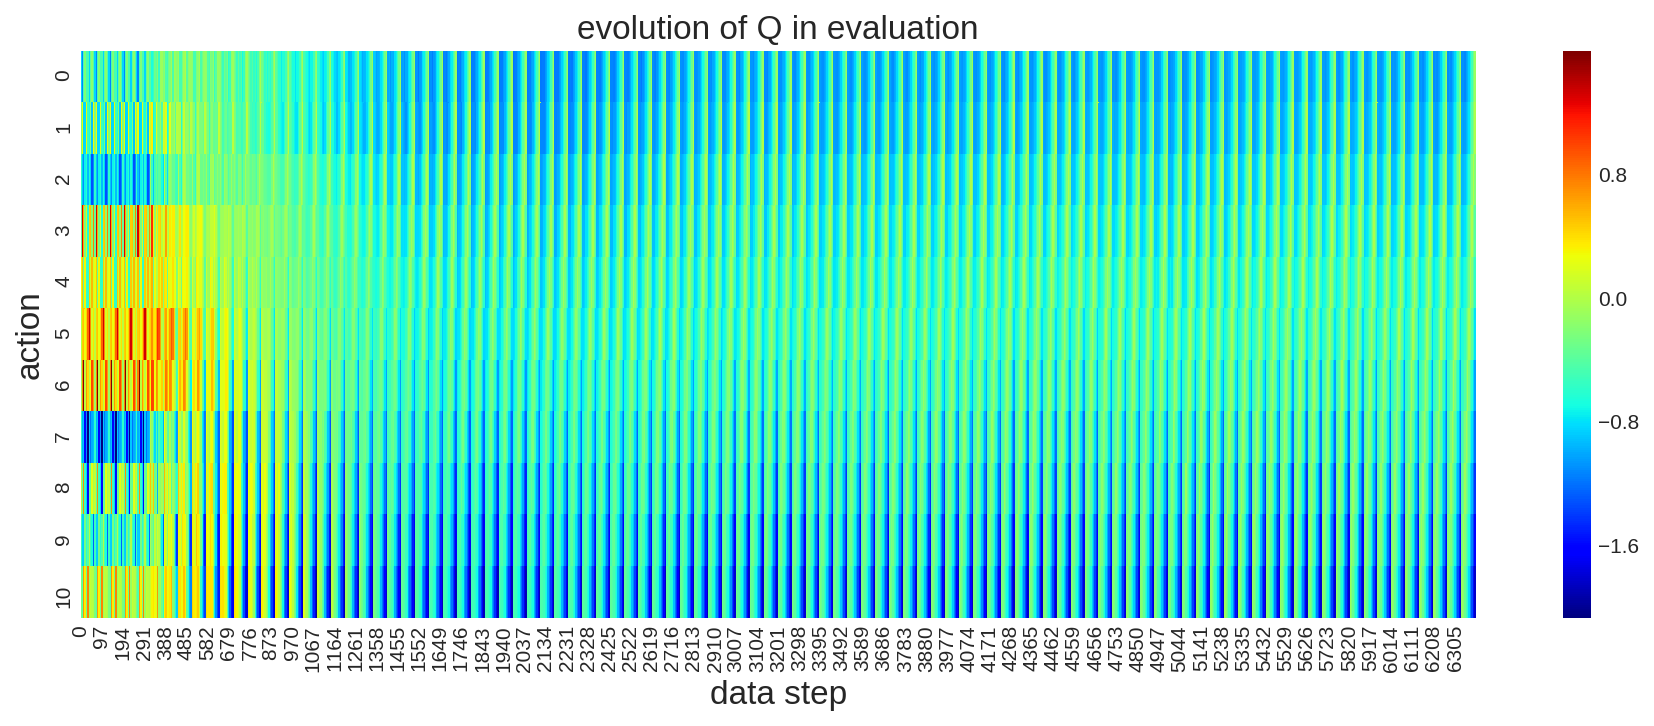

In [5]:
import DQN
import importlib
importlib.reload(DQN)  # original DRL code
from keras import optimizers

model = DQN.gen_model(input_shapes=env.shapes(), n_outputs=11, \
                           hidden_dims=[128, 64, 32], reg_l1=0.0, reg_l2=0.0, 
                           duel=False, duel_value_dim=8, duel_advantage_dim=16, 
                           input_reg=False, input_min=0, input_max=1,
                           output_reg=False, output_min=0, output_max=1)

#df = pd.DataFrame()
for lr, eps, boltzmann in itertools.product([1e-3,], [0.5,], [False,]):
    print('======================================================')
    print('lr={}, eps={}, boltzmann={}'
          .format(lr, eps, boltzmann))
    
    tester = DQN.Tester(env, model)
    #n_trials = 5
    #n_steps = 10000
    tester.test(n_trials=n_trials, n_steps=n_steps,
                training_interval=10, n_batches=10, batch_size=256, alpha=1.0, 
                target_update_interval=20, doubleQ=False,
                gamma=1.0, optimizer=optimizers.Adam(lr),
                epsilon_start=1.0, epsilon_end=eps, epsilon_interval=n_steps,
                boltzmann=boltzmann, 
                verbose=False, verbose_interval=100, evaluate_interval=100, 
                get_log=True)

    viz = DQN.Visualizer()
    viz.viz_action_history(tester.trainer, lambda x:x[0], 
                           cmap='jet', alpha=1.0, s=1.0)
    viz.viz_Q_history(tester.trainer)
    
    for trial in range(n_trials):
        df_temp = pd.DataFrame(np.ravel(tester.return_histories[trial]['all']), columns=['return'])
        df_temp['trial'] = trial
        df_temp['t'] = np.arange(len(df_temp))
        #df_temp['lr'] = lr
        #df_temp['eps'] = eps
        #df_temp['boltzmann'] = boltzmann
        df_temp['Agent'] = 'DQN'

        df = pd.concat([df, df_temp])

    #ModelInspection.inspect_hidden_layers(tester.env, tester.model, tester.agent, show_hidden_hist=True)

df.to_csv(tester.name + '.csv')

lr=0.01, n_advantages=10, mult_critic=0.1, mult_entropy=0.1
start testing... :  2019-10-29 09:46:06.313969
start 0/5 th trial...


100%|██████████| 10000/10000 [00:41<00:00, 240.57it/s]


start 1/5 th trial...


100%|██████████| 10000/10000 [00:42<00:00, 234.30it/s]


start 2/5 th trial...


100%|██████████| 10000/10000 [00:43<00:00, 229.92it/s]


start 3/5 th trial...


100%|██████████| 10000/10000 [00:44<00:00, 224.52it/s]


start 4/5 th trial...


100%|██████████| 10000/10000 [00:45<00:00, 219.99it/s]


end testing... :  2019-10-29 09:49:47.018827
loss and reward history


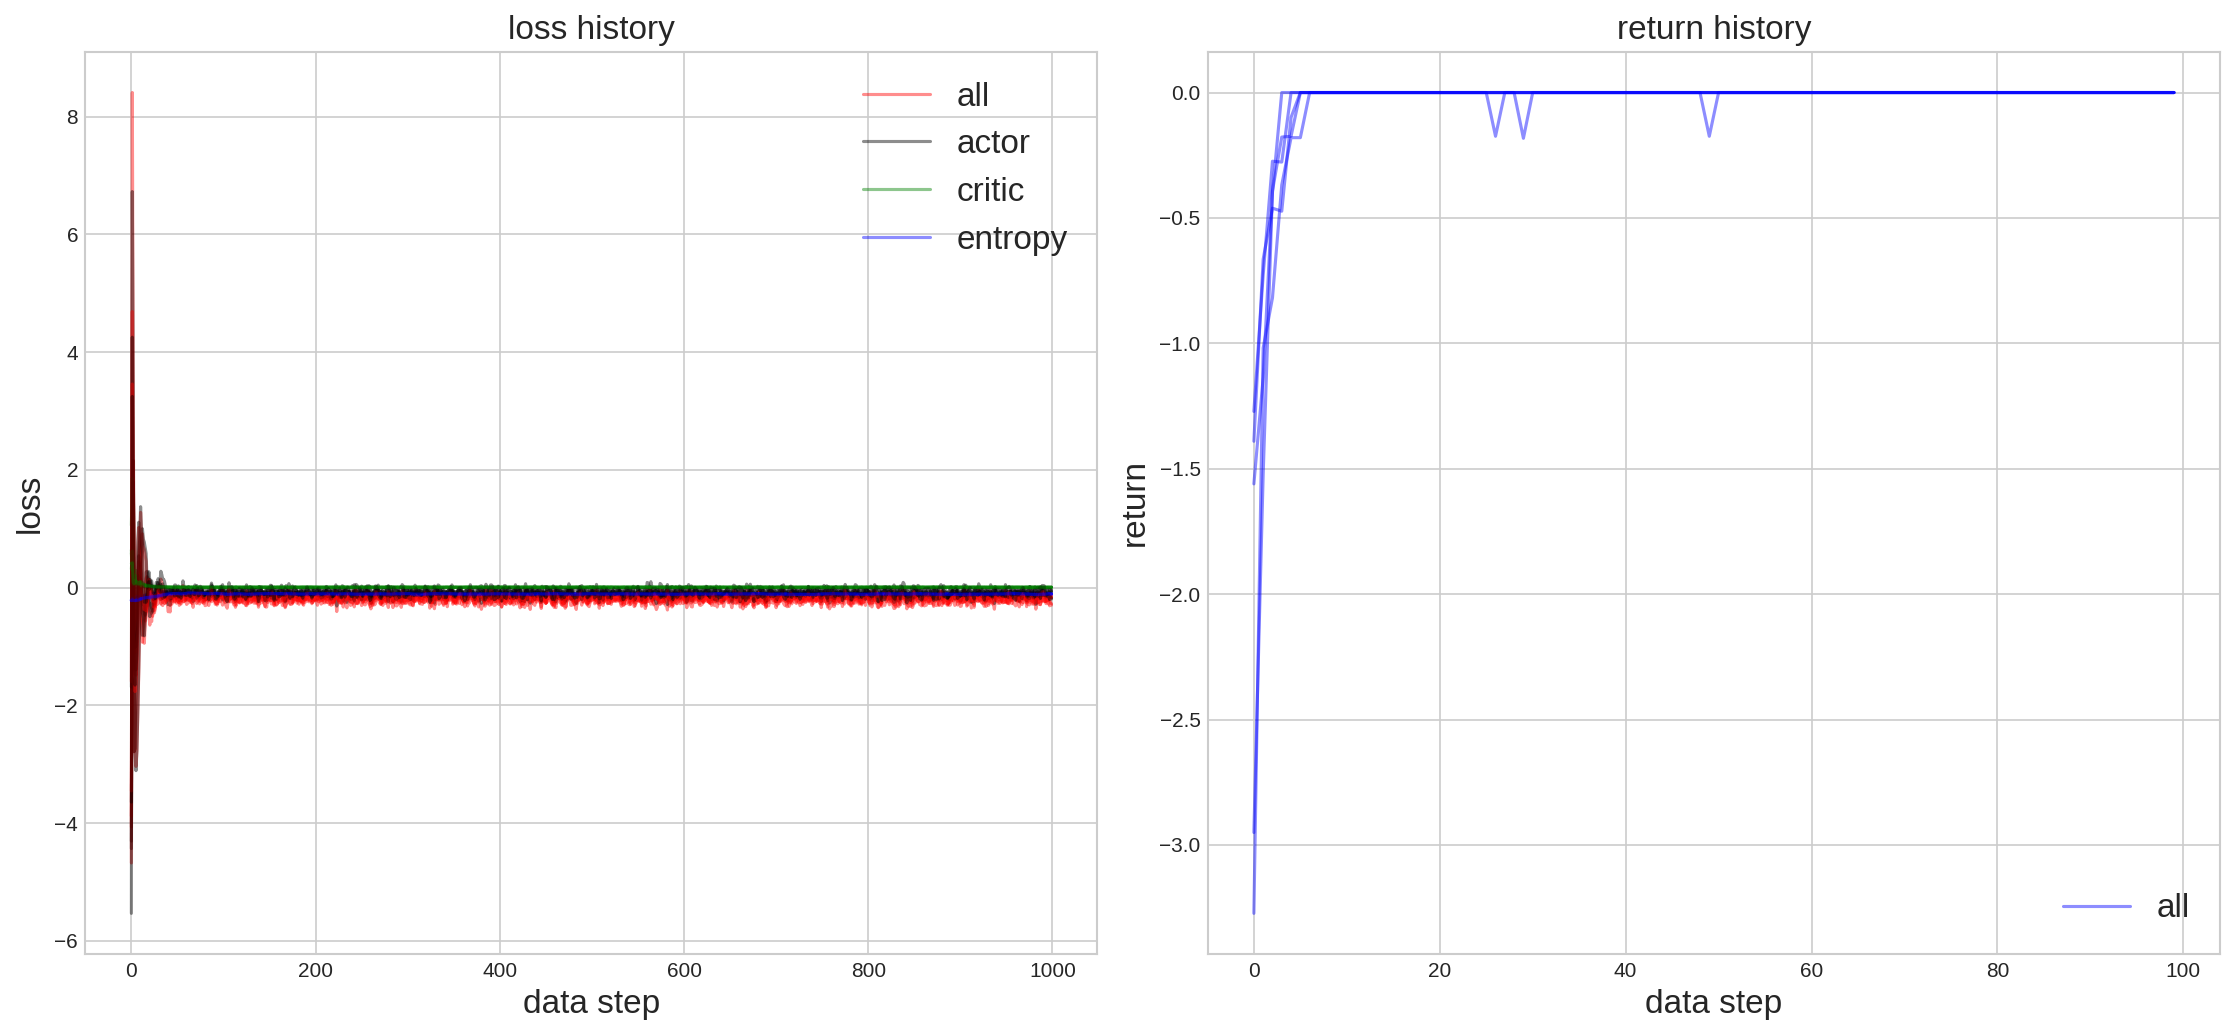

acquired action
action =  [10 10 10 10 10 10 10 10 10 10]
action =  [9 9 9 9 9 9 9 9 9 9]
action =  [8 8 8 8 8 8 8 8 8 8]
action =  [7 7 7 7 7 7 7 7 7 7]
action =  [6 6 6 6 6 6 6 6 6 6]
action =  [5 5 5 5 5 5 5 5 5 5]
action =  [4 4 4 4 4 4 4 4 4 4]
action =  [3 3 3 3 3 3 3 3 3 3]
action =  [2 2 2 2 2 2 2 2 2 2]
action =  [1 1 1 1 1 1 1 1 1 1]
return [-2.487e-14 -2.487e-14 -2.487e-14 -2.487e-14 -2.487e-14 -2.487e-14
 -2.487e-14 -2.487e-14 -2.487e-14 -2.487e-14]
param distribution in model


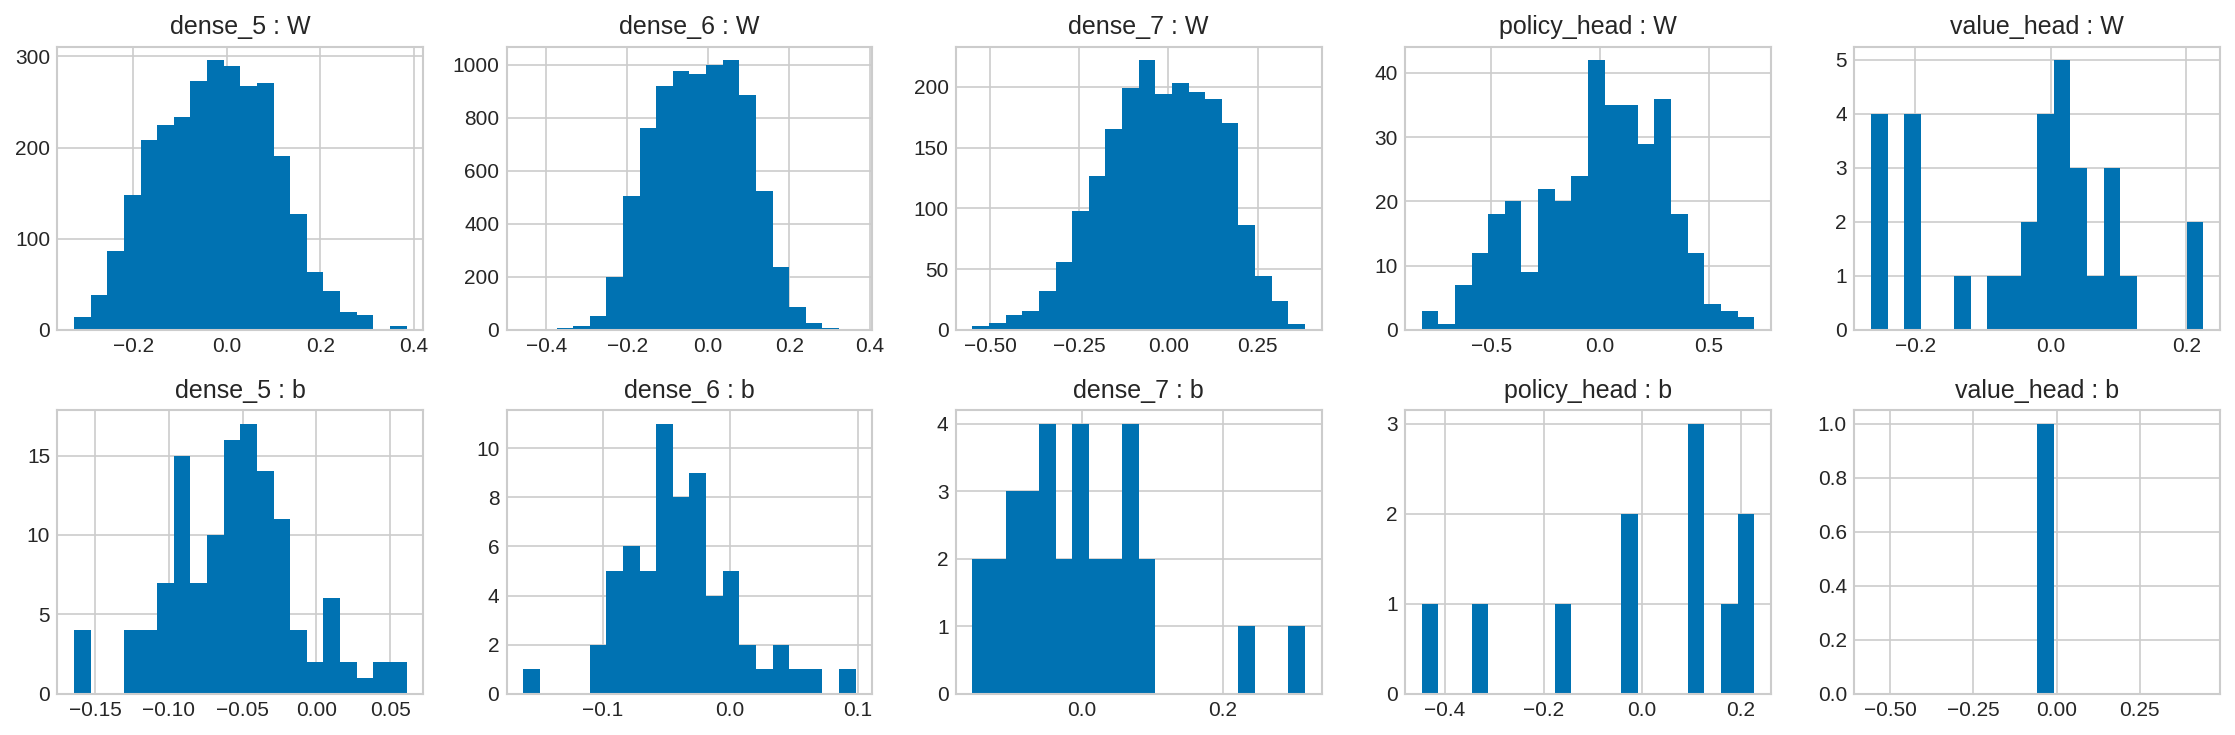

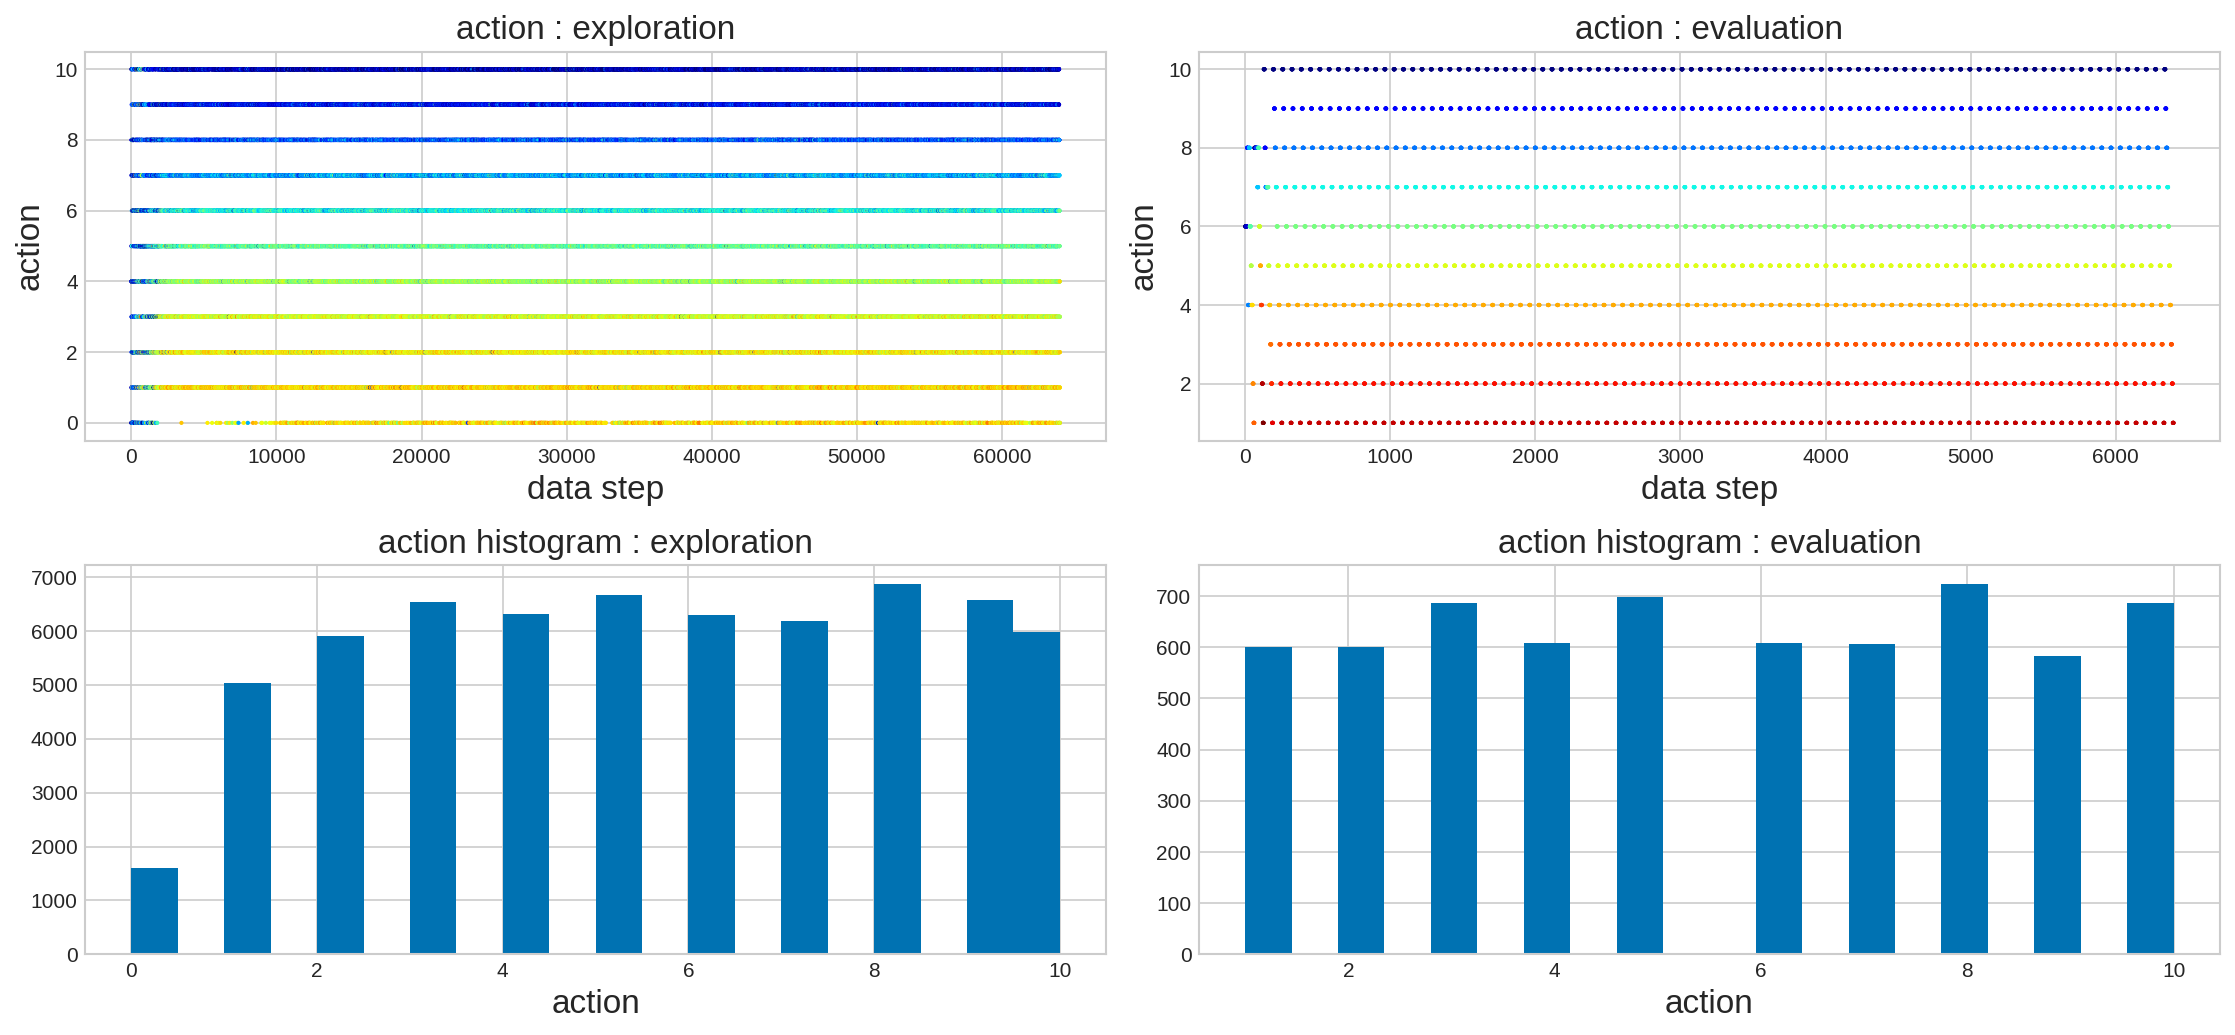

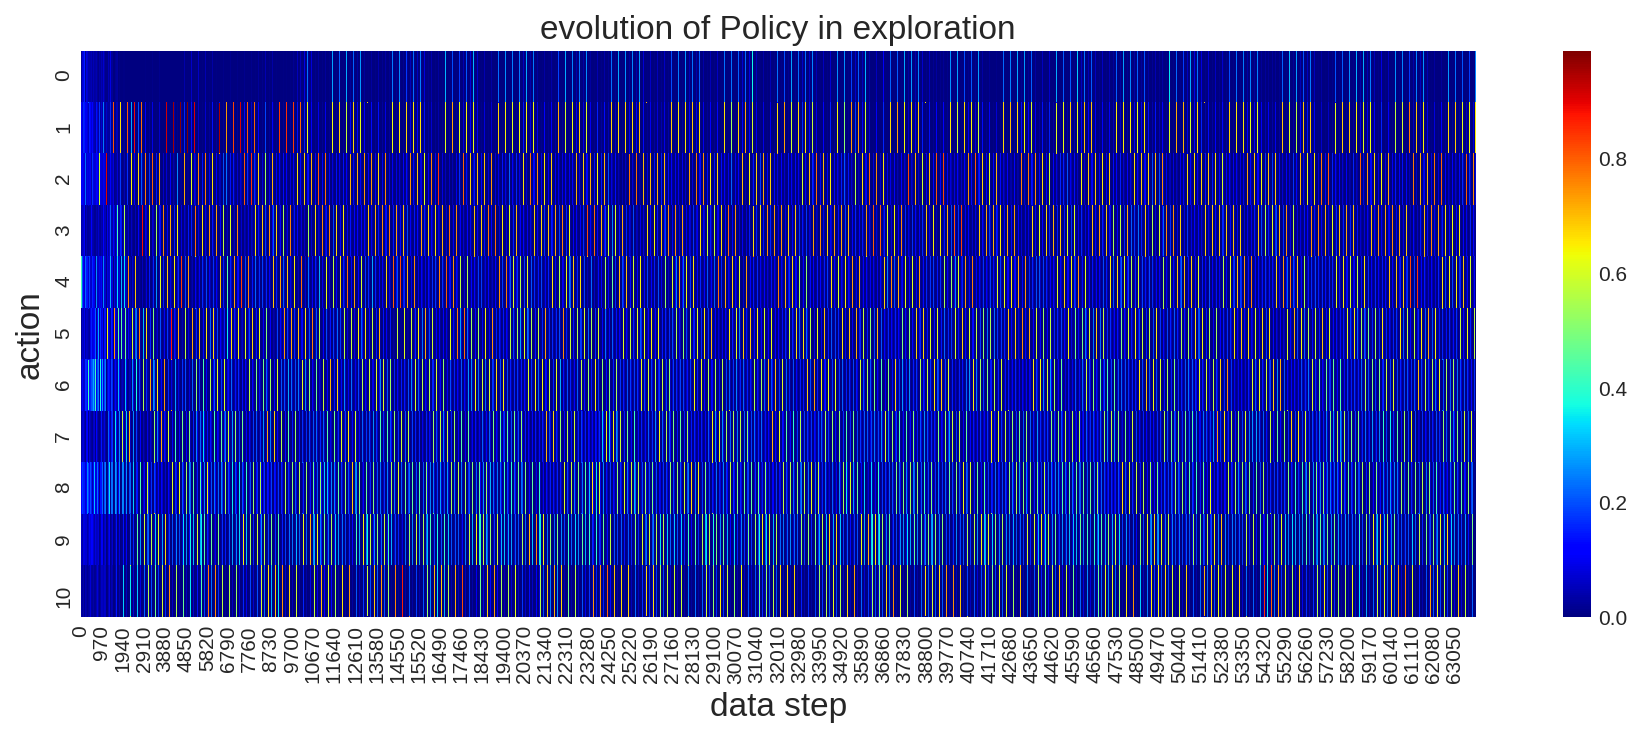

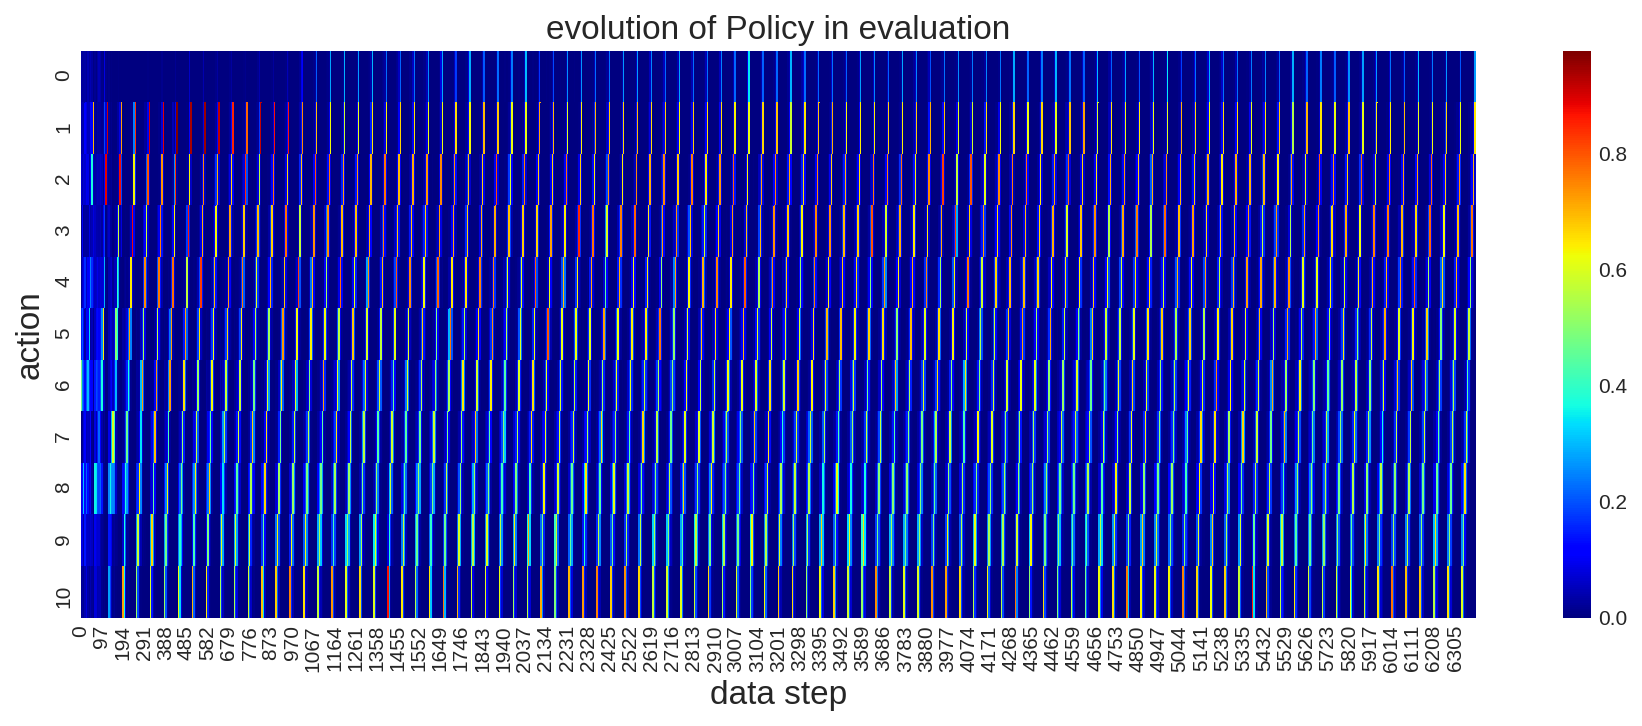

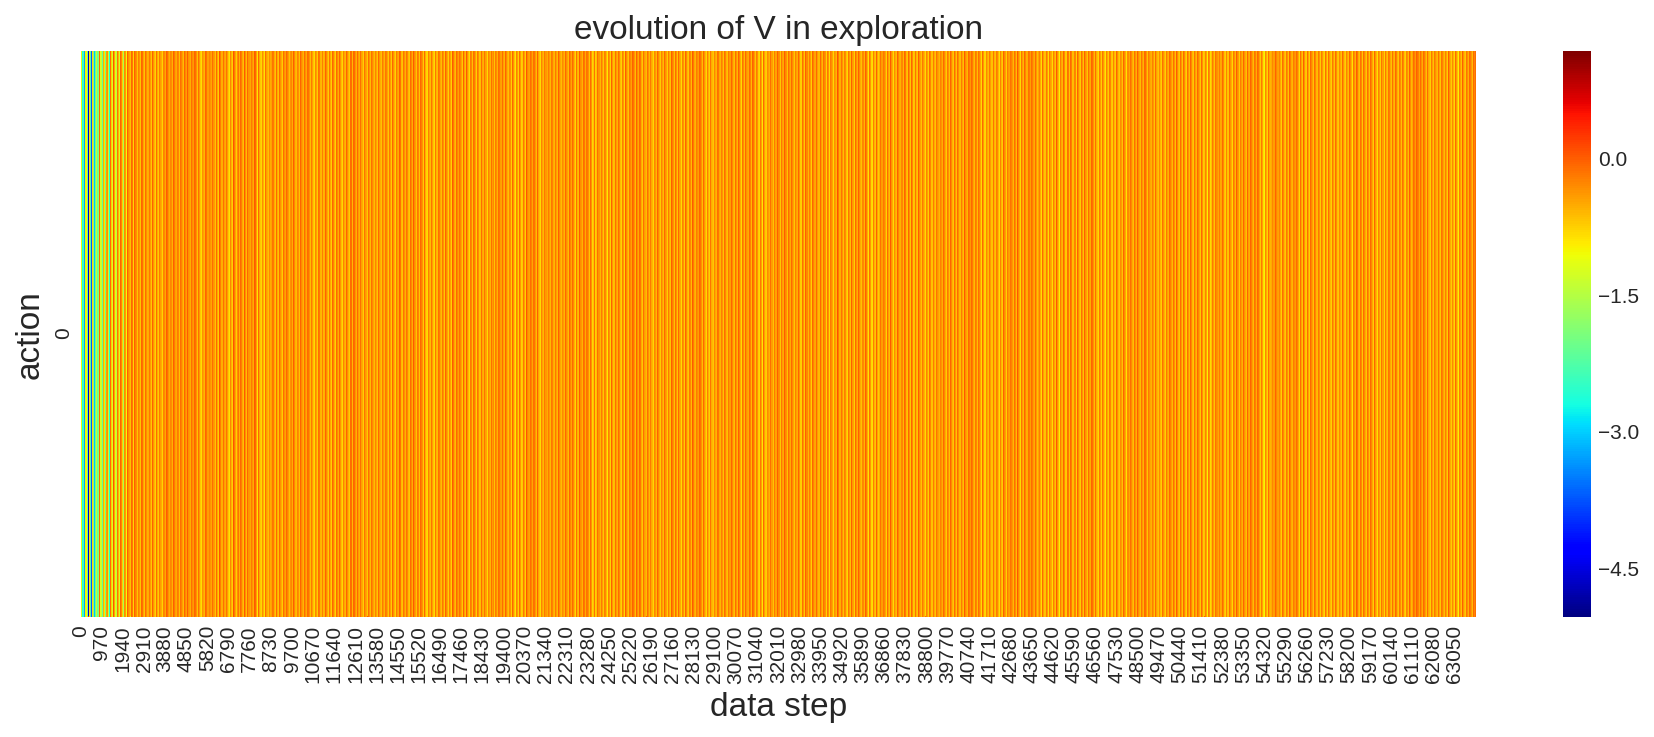

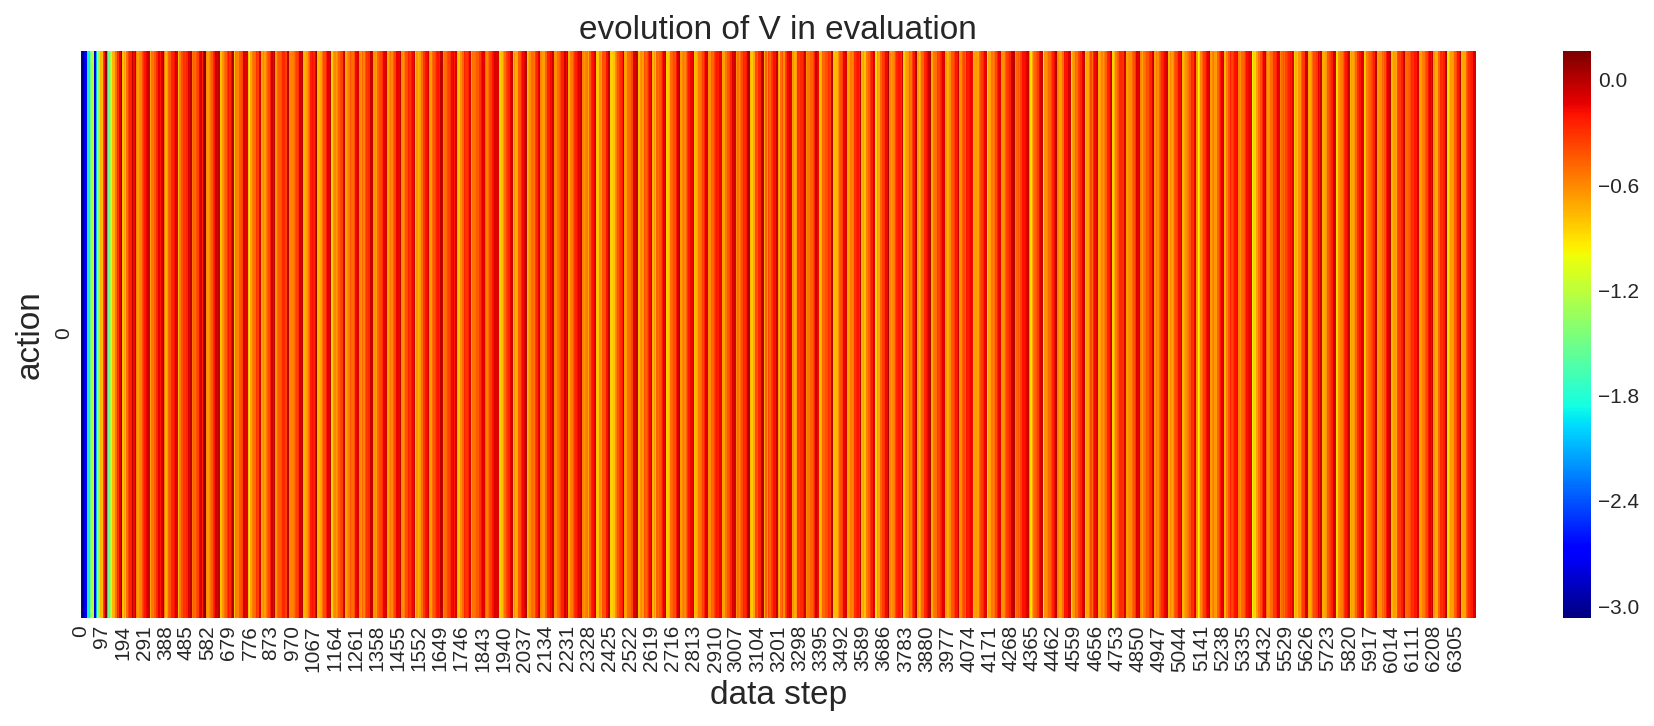

In [6]:
import A2C  # original DRL code
importlib.reload(A2C)  # original DRL code
from keras import optimizers

model = A2C.gen_model(input_shapes=env.shapes(), n_outputs=11, 
                      hidden_dims=[128, 64, 32])

#df = pd.DataFrame()
for lr, n_advantages, mult_critic, mult_entropy in itertools.product(
    [1e-2,], [10,], [0.1,], [0.1,]):
    print('======================================================')
    print('lr={}, n_advantages={}, mult_critic={}, mult_entropy={}'
          .format(lr, n_advantages, mult_critic, mult_entropy))
    
    tester = A2C.Tester(env, model)
    #n_trials = 5
    #n_steps = 10000
    tester.test(n_trials=n_trials, n_steps=n_steps, n_advantages=n_advantages,
               gamma=1.0, optimizer=optimizers.Adam(lr=lr),
               mult_actor=1.0, mult_critic=mult_critic, mult_entropy=mult_entropy,
               verbose=False, verbose_interval=100, evaluate_interval=100, 
               get_log=True)

    viz = A2C.Visualizer()
    viz.viz_action_history(tester.trainer, lambda x:x[0], 
                           cmap='jet', alpha=1.0, s=1.0)
    viz.viz_P_history(tester.trainer)
    viz.viz_V_history(tester.trainer)

    for trial in range(n_trials):
        df_temp = pd.DataFrame(np.ravel(tester.return_histories[trial]['all']), columns=['return'])
        df_temp['trial'] = trial
        df_temp['t'] = np.arange(len(df_temp))
        #df_temp['lr'] = lr
        #f_temp['n_advantages'] = n_advantages
        #df_temp['mult_critic'] = mult_critic
        #df_temp['mult_entropy'] = mult_entropy
        df_temp['Agent'] = 'A2C_discrete'

        df = pd.concat([df, df_temp])

    #ModelInspection.inspect_hidden_layers(tester.env, tester.model, tester.agent, show_hidden_hist=True)

df.to_csv(tester.name + '.csv')

In [7]:
mu_min = 0.0
mu_max = 10.0

lr=0.001, n_advantages=10, mult_critic=0.1, mult_entropy=0.01
start testing... :  2019-10-29 09:49:59.190630
start 0/5 th trial...


  0%|          | 1/10000 [00:00<1:24:25,  1.97it/s]W1029 09:50:00.675693 140549093623616 deprecation.py:323] From /home/deepstation/.pyenv/versions/anaconda3-5.0.1/envs/ForChainer/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1205: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
100%|██████████| 10000/10000 [00:31<00:00, 313.59it/s]


start 1/5 th trial...


100%|██████████| 10000/10000 [00:33<00:00, 300.66it/s]


start 2/5 th trial...


100%|██████████| 10000/10000 [00:34<00:00, 290.22it/s]


start 3/5 th trial...


100%|██████████| 10000/10000 [00:35<00:00, 280.98it/s]


start 4/5 th trial...


100%|██████████| 10000/10000 [00:36<00:00, 273.66it/s]


end testing... :  2019-10-29 09:52:55.644783
loss and reward history


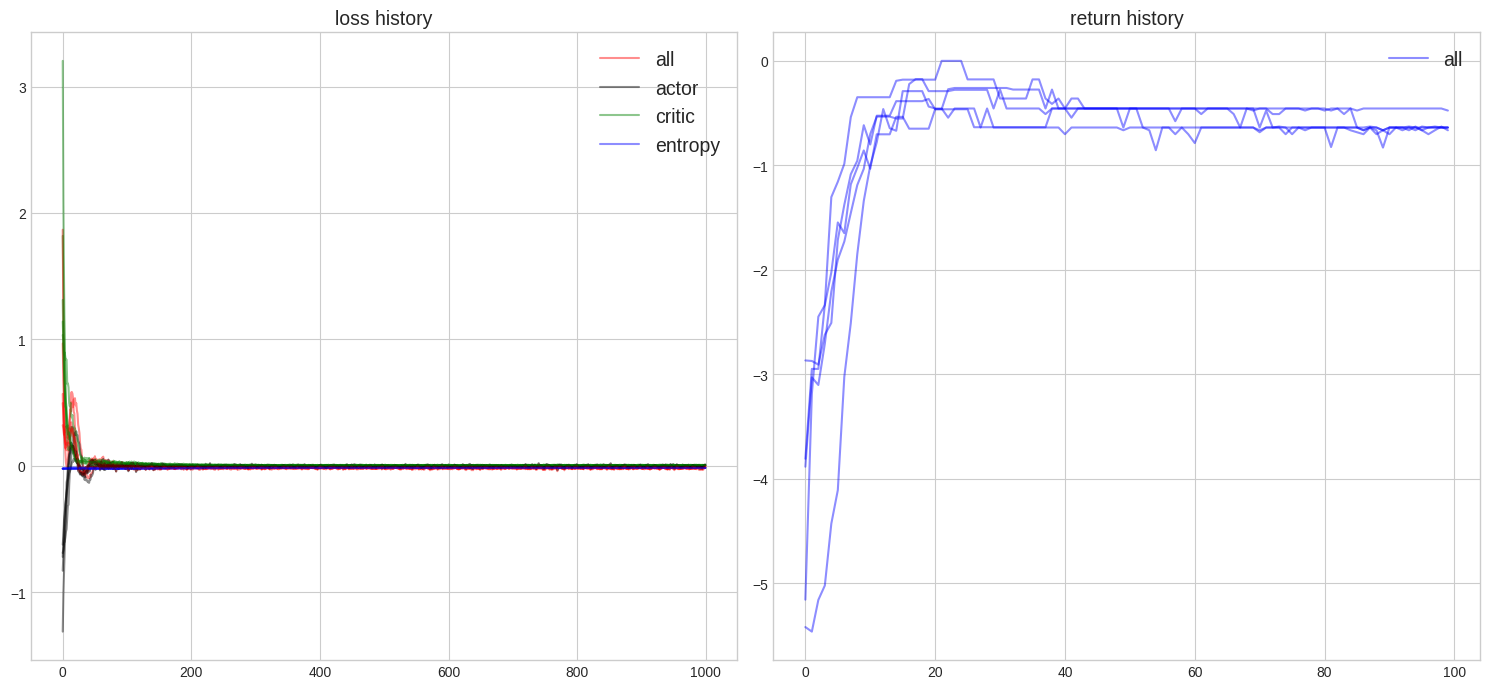

acquired action
action =  [9.975 9.975 9.975 9.975 9.975 9.975 9.975 9.975 9.975 9.975]
action =  [9.963 9.963 9.963 9.963 9.963 9.963 9.963 9.963 9.963 9.963]
action =  [9.709 9.709 9.709 9.709 9.709 9.709 9.709 9.709 9.709 9.709]
action =  [6.511 6.511 6.511 6.511 6.511 6.511 6.511 6.511 6.511 6.511]
action =  [5.415 5.415 5.415 5.415 5.415 5.415 5.415 5.415 5.415 5.415]
action =  [4.623 4.623 4.623 4.623 4.623 4.623 4.623 4.623 4.623 4.623]
action =  [3.834 3.834 3.834 3.834 3.834 3.834 3.834 3.834 3.834 3.834]
action =  [2.72 2.72 2.72 2.72 2.72 2.72 2.72 2.72 2.72 2.72]
action =  [1.839 1.839 1.839 1.839 1.839 1.839 1.839 1.839 1.839 1.839]
action =  [0.052 0.052 0.052 0.052 0.052 0.052 0.052 0.052 0.052 0.052]
return [-0.665 -0.665 -0.665 -0.665 -0.665 -0.665 -0.665 -0.665 -0.665 -0.665]
param distribution in model


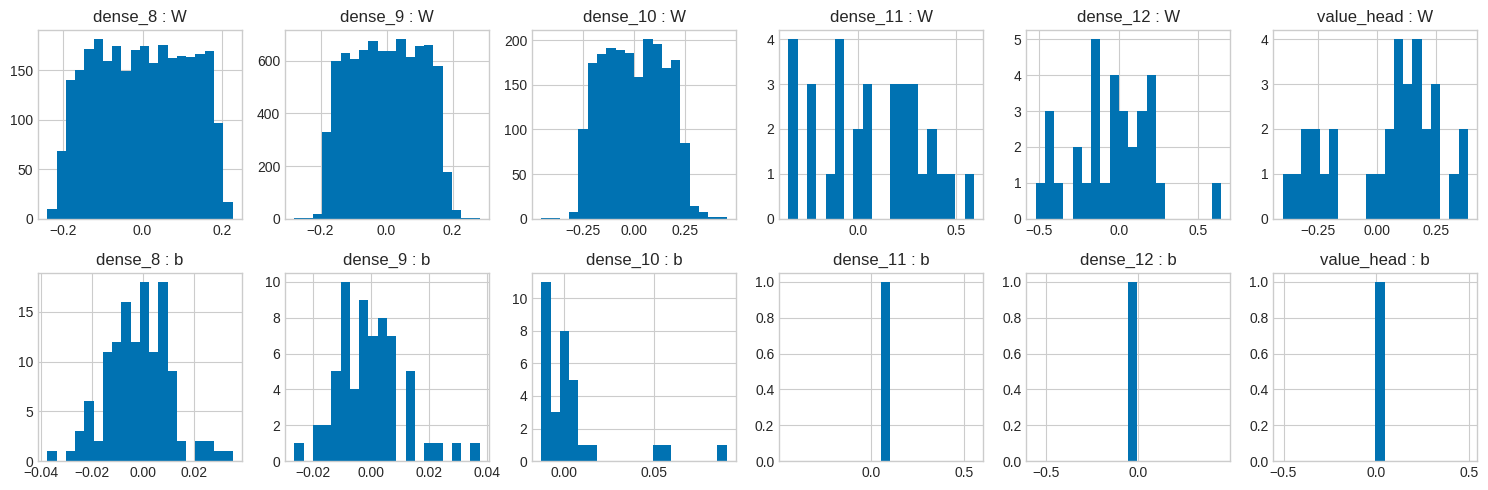

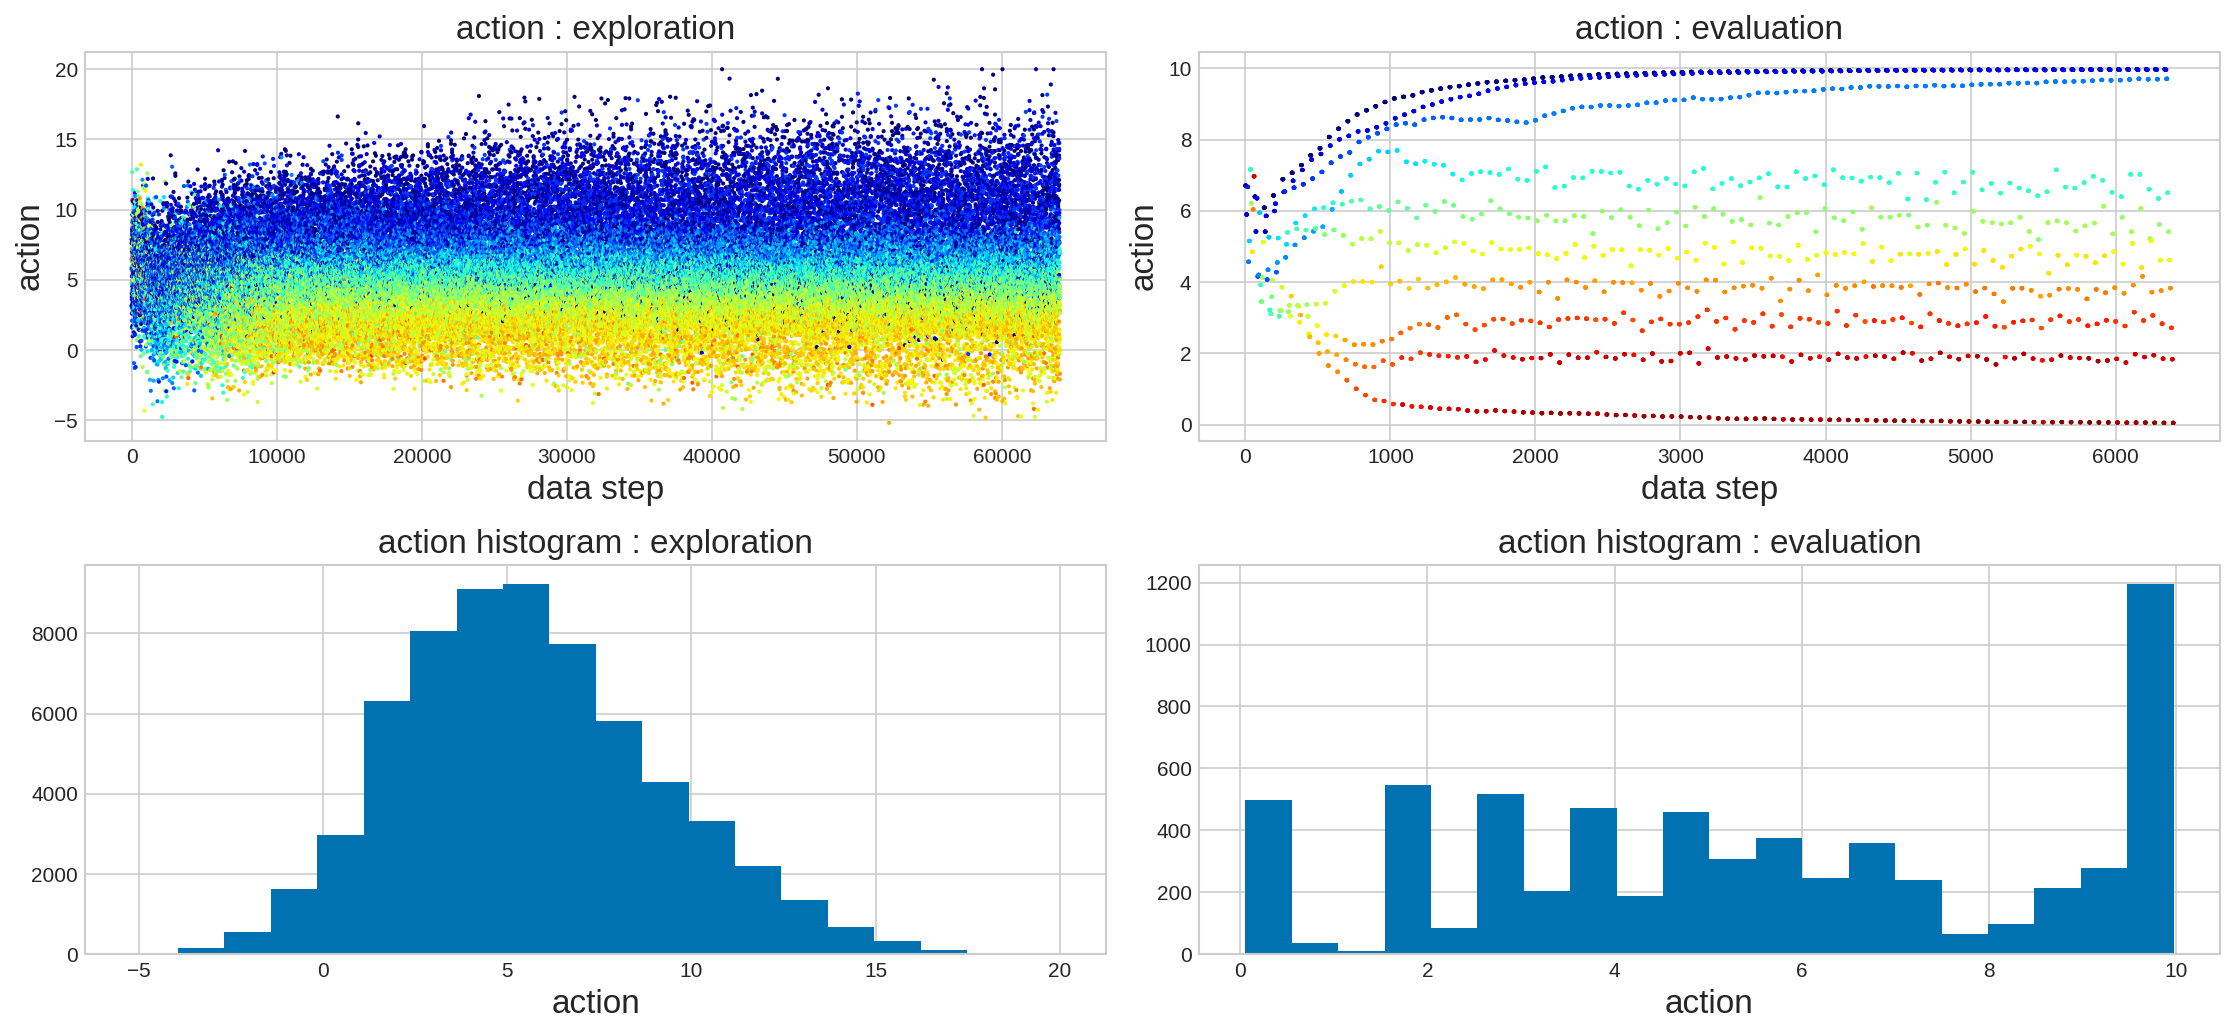

In [8]:
import importlib
import A2C_continuous
importlib.reload(A2C_continuous)  # original DRL code

from keras import optimizers

mu_min = mu_min
mu_max = mu_max
sigma_max = (mu_max - mu_min) / 3

model = A2C_continuous.gen_model(input_shapes=env.shapes(), n_outputs=1, \
                                 hidden_dims=[128, 64, 32], reg_l1=0.0, reg_l2=0.0, \
                                mu_min=mu_min, mu_max=mu_max, 
                                va_min=(0.001)**2, va_max=sigma_max**2, 
                                input_reg=False, input_min=0, input_max=1)

#df = pd.DataFrame()
for lr, n_advantages, mult_critic, mult_entropy in itertools.product(
    [1e-3,], [10,], [0.1,], [0.01,]):
    print('======================================================')
    print('lr={}, n_advantages={}, mult_critic={}, mult_entropy={}'
          .format(lr, n_advantages, mult_critic, mult_entropy))
    
    tester = A2C_continuous.Tester(env, model, val_min=mu_min-3*sigma_max, val_max=mu_max+3*sigma_max)
    #n_trials = 5
    #n_steps = 10000
    tester.test(n_trials=n_trials, n_steps=n_steps, n_advantages=n_advantages,
               gamma=1.0, optimizer=optimizers.Adam(lr=lr),
               mult_actor=0.1, mult_critic=mult_critic, mult_entropy=mult_entropy,
               verbose=False, verbose_interval=100, evaluate_interval=100, 
               get_log=True)

    viz = A2C_continuous.Visualizer()
    viz.viz_action_history(tester.trainer, state_valuation=lambda x:x[0], action_valuation=lambda x:x, 
                           cmap='jet', alpha=1.0, s=1.0)

    for trial in range(n_trials):
        df_temp = pd.DataFrame(np.ravel(tester.return_histories[trial]['all']), columns=['return'])
        df_temp['trial'] = trial
        df_temp['t'] = np.arange(len(df_temp))
        #df_temp['lr'] = lr
        #df_temp['n_advantages'] = n_advantages
        #df_temp['mult_critic'] = mult_critic
        #df_temp['mult_entropy'] = mult_entropy
        df_temp['Agent'] = 'A2C_continuous'

        df = pd.concat([df, df_temp])

    #ModelInspection.inspect_hidden_layers(tester.env, tester.model, tester.agent, show_hidden_hist=True)

df.to_csv(tester.name + '.csv')

lr_p=0.0001, lr_v=0.001, boltzmann=False, sigma_end=1.0, tau_end=10
start testing... :  2019-10-29 09:53:01.329853
start 0/5 th trial...


100%|██████████| 10000/10000 [04:19<00:00, 38.53it/s]


start 1/5 th trial...


100%|██████████| 10000/10000 [04:27<00:00, 37.38it/s]


start 2/5 th trial...


100%|██████████| 10000/10000 [04:32<00:00, 36.64it/s]


start 3/5 th trial...


100%|██████████| 10000/10000 [04:42<00:00, 35.34it/s]


start 4/5 th trial...


100%|██████████| 10000/10000 [04:48<00:00, 26.41it/s]


end testing... :  2019-10-29 10:16:13.603253
loss and reward history


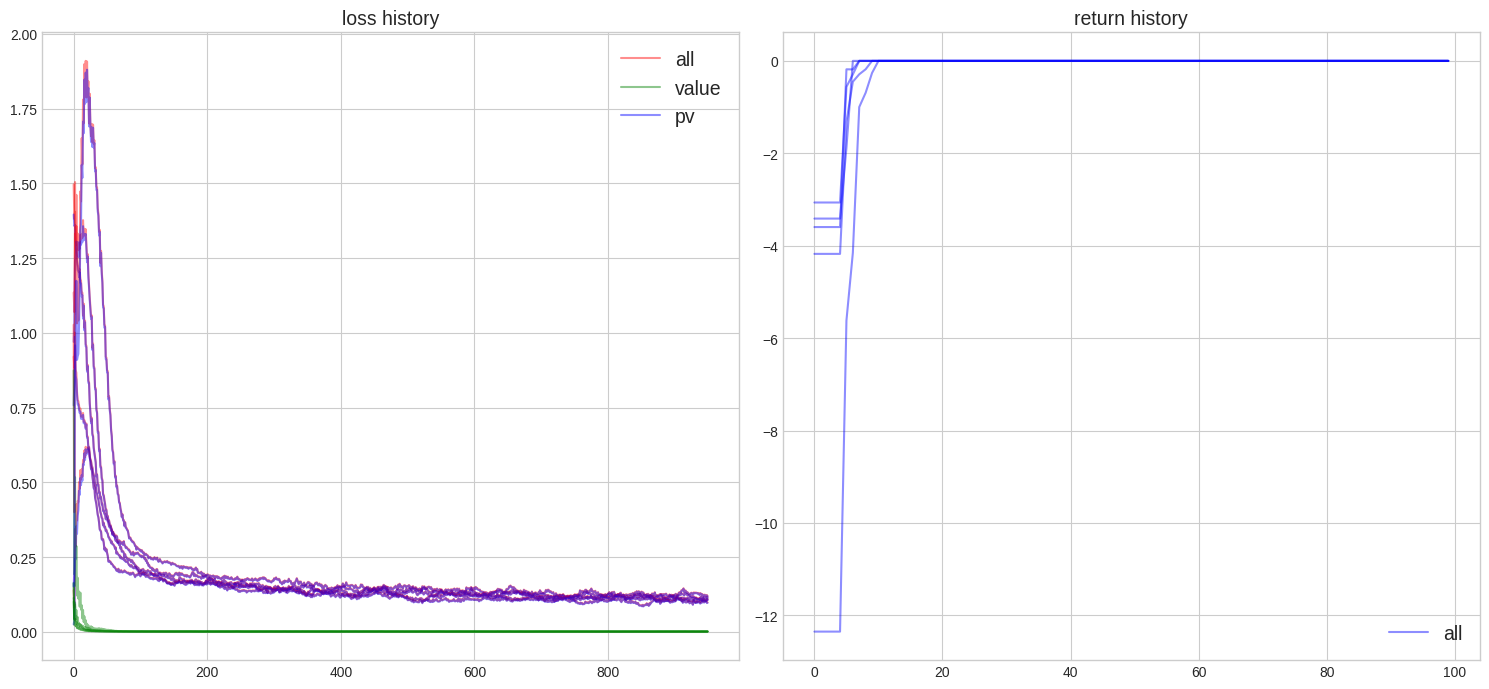

acquired action
action =  [10. 10. 10. 10. 10. 10. 10. 10. 10. 10.]
action =  [9.137 9.137 9.137 9.137 9.137 9.137 9.137 9.137 9.137 9.137]
action =  [8.058 8.058 8.058 8.058 8.058 8.058 8.058 8.058 8.058 8.058]
action =  [6.962 6.962 6.962 6.962 6.962 6.962 6.962 6.962 6.962 6.962]
action =  [5.942 5.942 5.942 5.942 5.942 5.942 5.942 5.942 5.942 5.942]
action =  [4.998 4.998 4.998 4.998 4.998 4.998 4.998 4.998 4.998 4.998]
action =  [4.063 4.063 4.063 4.063 4.063 4.063 4.063 4.063 4.063 4.063]
action =  [2.89 2.89 2.89 2.89 2.89 2.89 2.89 2.89 2.89 2.89]
action =  [1.876 1.876 1.876 1.876 1.876 1.876 1.876 1.876 1.876 1.876]
action =  [0.944 0.944 0.944 0.944 0.944 0.944 0.944 0.944 0.944 0.944]
return [-2.487e-14 -2.487e-14 -2.487e-14 -2.487e-14 -2.487e-14 -2.487e-14
 -2.487e-14 -2.487e-14 -2.487e-14 -2.487e-14]
param distribution in model_policy


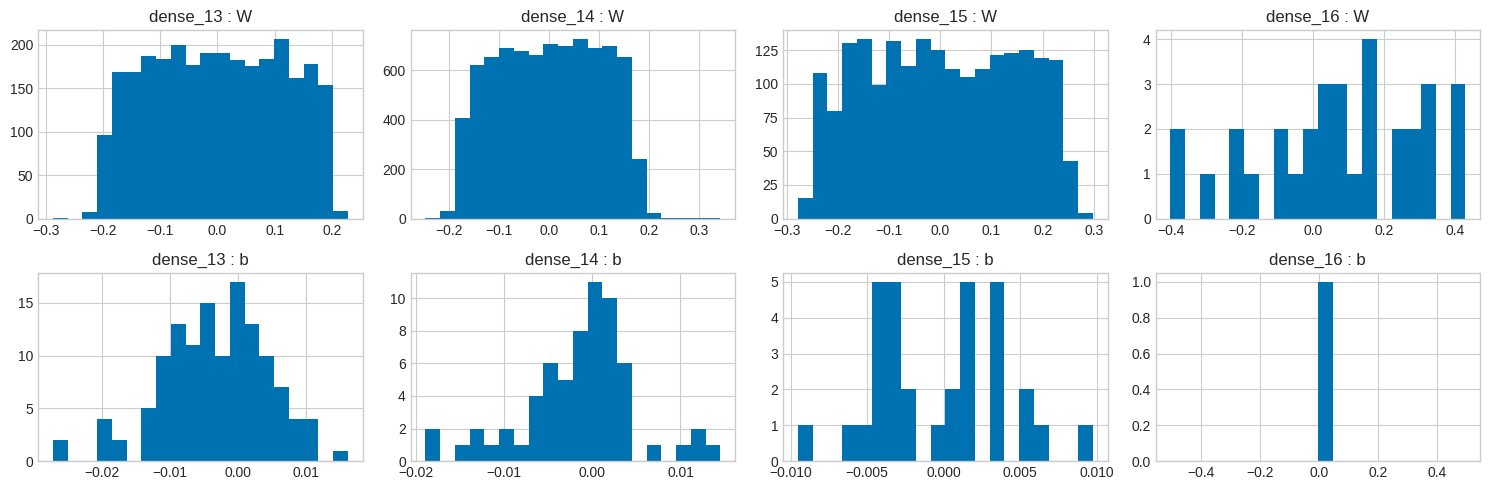

param distribution in model_value


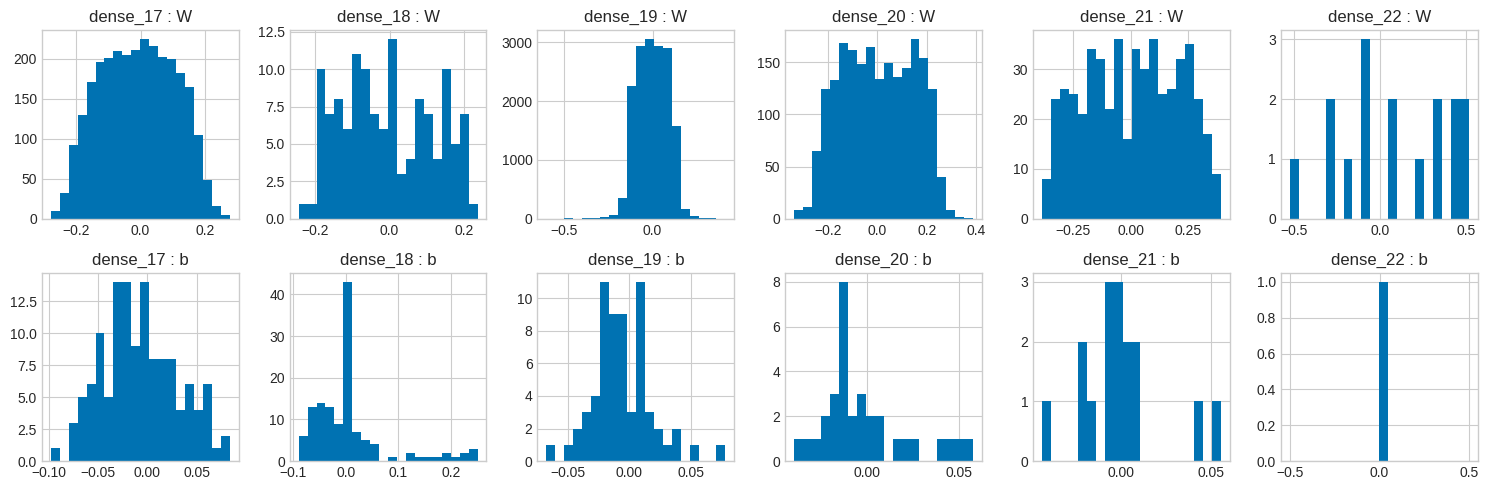

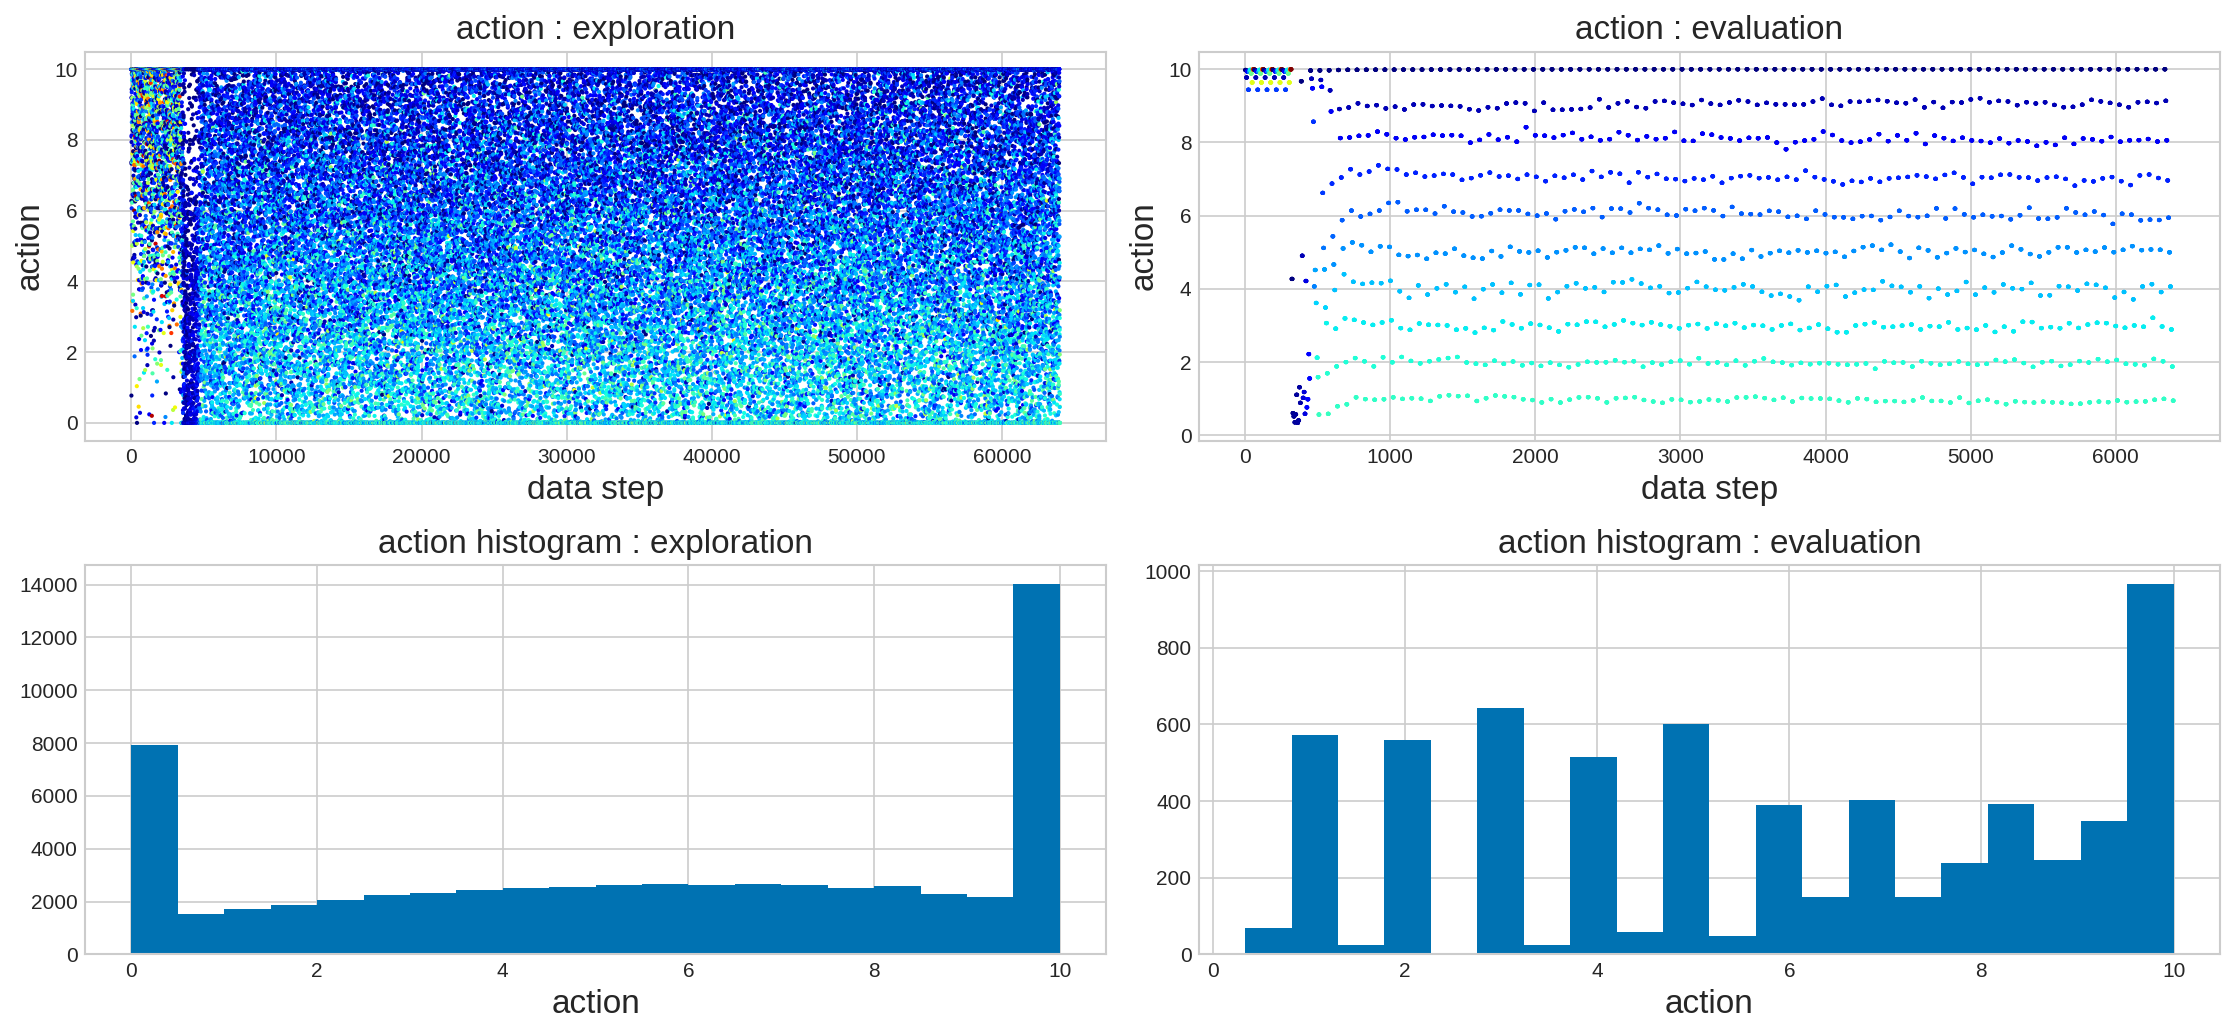

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [9]:
import DDPG  # original DRL code
importlib.reload(DDPG)
from keras import optimizers

action_min = mu_min
action_max = mu_max
sigma_max = (action_max - action_min) / 3

model_policy = DDPG.gen_model_policy(state_shapes=env.shapes(), n_actions=1, 
                                     hidden_dims=[128, 64, 32], 
                                     reg_l1=0.0, reg_l2=0.0, 
                                     action_min=action_min, action_max=action_max, 
                                     batch_norm_input=False, 
                                     state_reg=False, state_min=0, state_max=10)

model_value = DDPG.gen_model_value(state_shapes=env.shapes(), n_actions=1, \
                                   hidden_action_dims=[128,], 
                                   hidden_state_dims=[128,],
                                   hidden_dims=[64, 32, 16],
                                   reg_l1=0.0, reg_l2=0.0,
                                   batch_norm_state_hidden=False)


#df = pd.DataFrame()
for lr_p, lr_v, boltzmann, sigma_end, tau_end in itertools.product(
    [1e-4,], [1e-3,], [False,], [1.0,], [10,]):
    print('======================================================')
    print('lr_p={}, lr_v={}, boltzmann={}, sigma_end={}, tau_end={}'
          .format(lr_p, lr_v, boltzmann, sigma_end, tau_end))
    
    tester = DDPG.Tester(env, model_policy, model_value, val_min=action_min, val_max=action_max)
    #n_trials = 5
    #n_steps = 10000
    tester.test(n_trials=n_trials,
                gamma=1.0,
                n_steps=n_steps, training_interval=10, n_batches=10, batch_size=256,
                target_update_interval_policy=20, target_update_interval_value=20,
                tau_policy=0.5, tau_value=0.5,
                optimizer_pv=optimizers.Adam(lr=lr_p), optimizer_value=optimizers.Adam(lr=lr_v),
                sigma_start=sigma_max, sigma_end=sigma_max*sigma_end, sigma_interval=n_steps,
                boltzmann=boltzmann, tau_start=10, tau_end=tau_end, tau_interval=n_steps, n_samples=64,
                verbose=False, verbose_interval=100, evaluate_interval=100, 
                wampup_steps=500, 
                get_log=True)

    viz = DDPG.Visualizer()
    viz.viz_action_history(tester.trainer, state_valuation=lambda x:x[0], action_valuation=lambda x:x, 
                               cmap='jet', alpha=1.0, s=1.0)
    viz.viz_Q_history(trainer=tester.trainer, 
                      state_valuation=lambda x:np.ravel(x[0][:, 0]), 
                      action_valuation=lambda x:np.ravel(x[:, 0]),
                      data_span_exp=100, data_span_eva=100,)
    
    for trial in range(n_trials):
        df_temp = pd.DataFrame(np.ravel(tester.return_histories[trial]['all']), columns=['return'])
        df_temp['trial'] = trial
        df_temp['t'] = np.arange(len(df_temp))
        #df_temp['lr_p'] = lr_p
        #df_temp['lr_v'] = lr_v
        #df_temp['boltzmann'] = boltzmann
        #df_temp['sigma_end'] = sigma_end
        #df_temp['tau_end'] = tau_end
        df_temp['Agent'] = 'DDPG'

        df = pd.concat([df, df_temp])

    #ModelInspection.inspect_hidden_layers(tester.env, tester.model, tester.agent, show_hidden_hist=True)

df.to_csv(tester.name + '.csv')

lr=0.0001, sigma_end=0.5
start testing... :  2019-10-29 10:16:29.017457
start trial 0/5 trial...


100%|██████████| 10000/10000 [00:50<00:00, 198.81it/s]


start trial 1/5 trial...


100%|██████████| 10000/10000 [00:51<00:00, 195.24it/s]


start trial 2/5 trial...


100%|██████████| 10000/10000 [00:52<00:00, 190.63it/s]


start trial 3/5 trial...


100%|██████████| 10000/10000 [00:54<00:00, 185.18it/s]


start trial 4/5 trial...


100%|██████████| 10000/10000 [00:55<00:00, 180.14it/s]


end testing... :  2019-10-29 10:21:02.521335
loss and return history


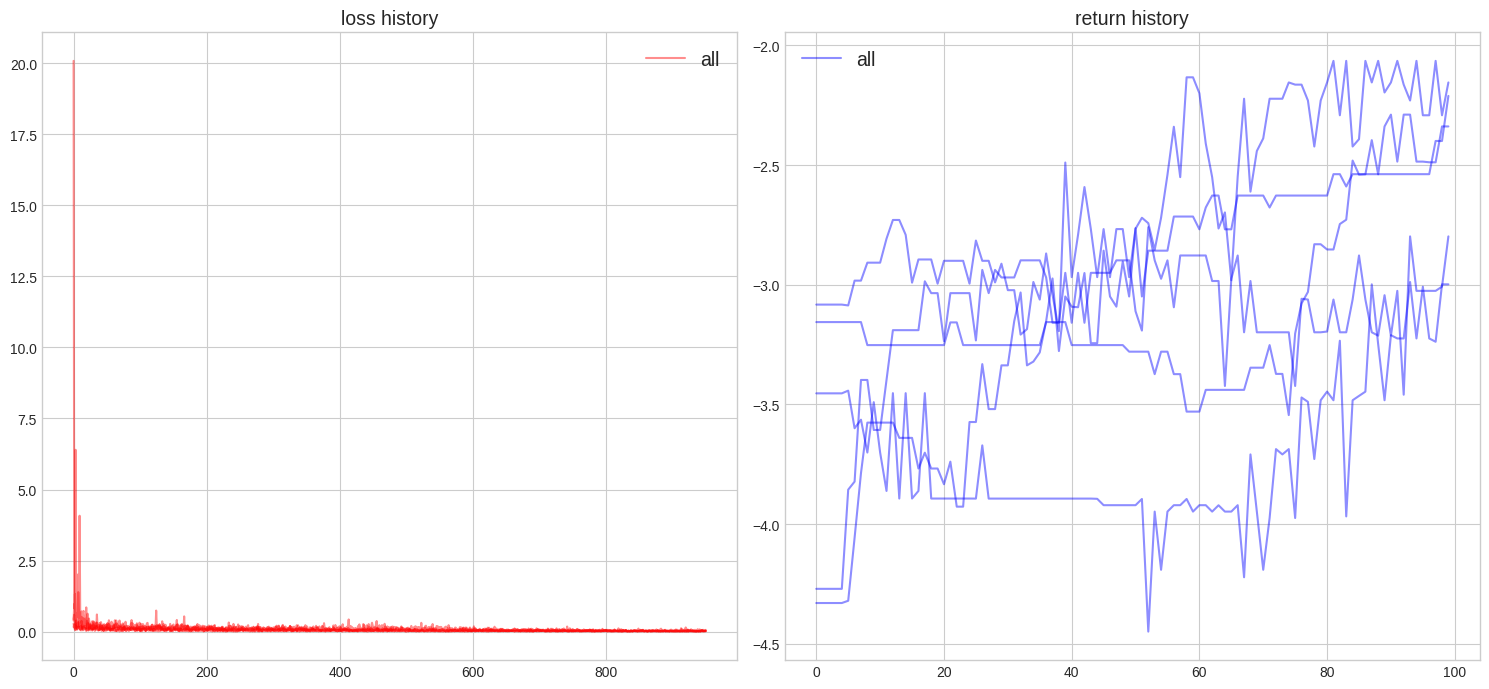

acquired action
action =  [8.433 8.433 8.433 8.433 8.433 8.433 8.433 8.433 8.433 8.433]
action =  [8.546 8.546 8.546 8.546 8.546 8.546 8.546 8.546 8.546 8.546]
action =  [8.205 8.205 8.205 8.205 8.205 8.205 8.205 8.205 8.205 8.205]
action =  [8.727 8.727 8.727 8.727 8.727 8.727 8.727 8.727 8.727 8.727]
action =  [8.467 8.467 8.467 8.467 8.467 8.467 8.467 8.467 8.467 8.467]
action =  [4.833 4.833 4.833 4.833 4.833 4.833 4.833 4.833 4.833 4.833]
action =  [4.956 4.956 4.956 4.956 4.956 4.956 4.956 4.956 4.956 4.956]
action =  [4.886 4.886 4.886 4.886 4.886 4.886 4.886 4.886 4.886 4.886]
action =  [4.928 4.928 4.928 4.928 4.928 4.928 4.928 4.928 4.928 4.928]
action =  [4.849 4.849 4.849 4.849 4.849 4.849 4.849 4.849 4.849 4.849]
return [-2.998 -2.998 -2.998 -2.998 -2.998 -2.998 -2.998 -2.998 -2.998 -2.998]
param distribution in model


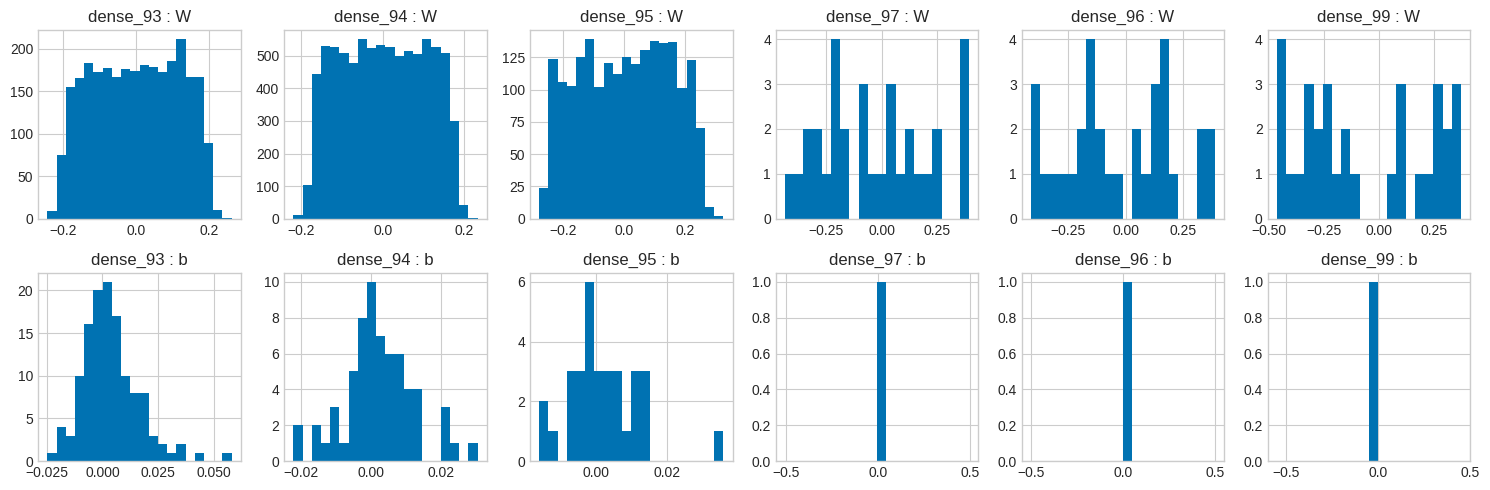

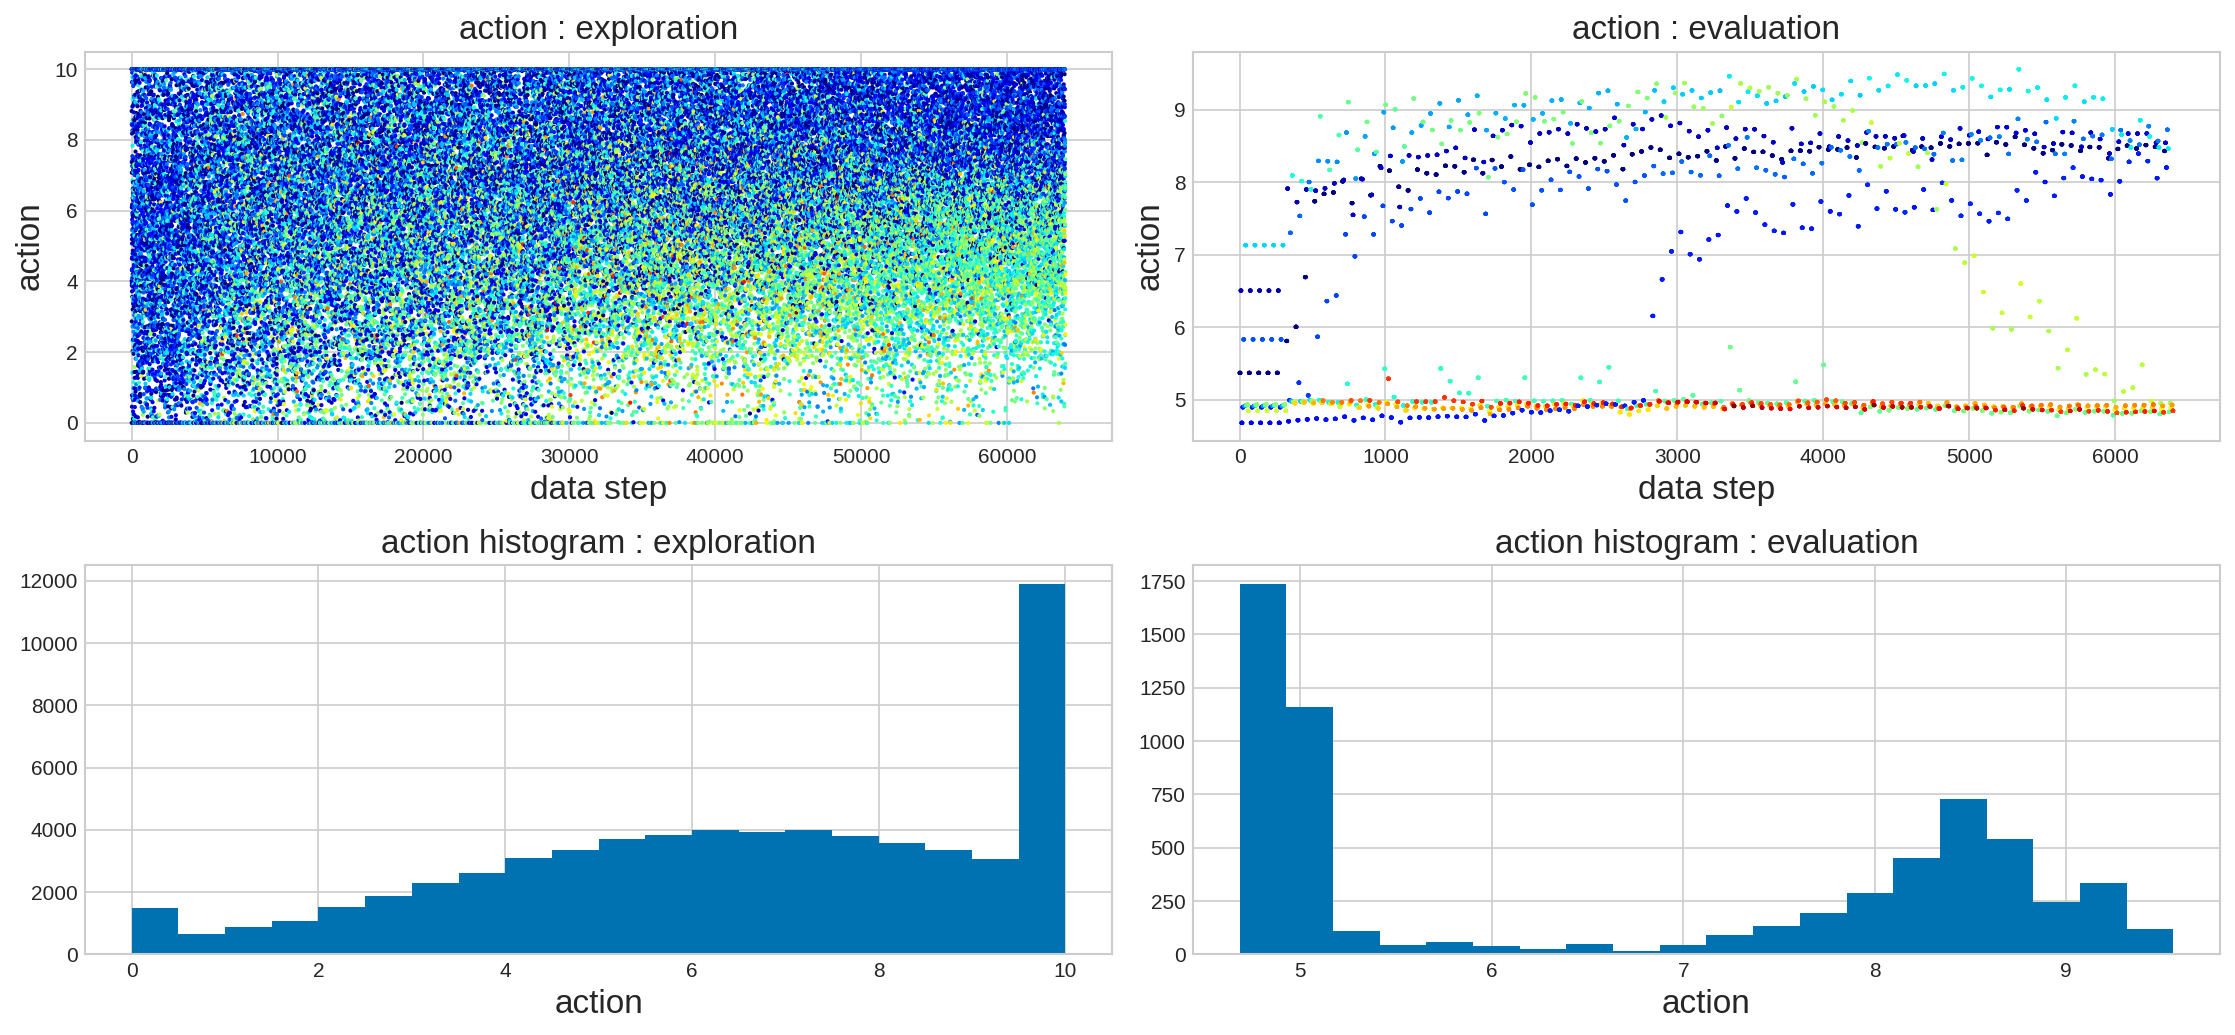

In [10]:
import NAF
importlib.reload(NAF)

from keras import optimizers
np.set_printoptions(precision=3)  # 数値桁数を指定．

action_min = mu_min
action_max = mu_max
sigma = (action_max - action_min) / 3

model_gen_func = lambda : NAF.gen_model(input_shapes=env.shapes(), n_actions=1, 
                     hidden_dims=[128, 64, 32], reg_l1=0.0, reg_l2=0.0, 
                     input_reg=False, input_min=0, input_max=10, 
                     action_reg=True, action_min=action_min, action_max=action_max,
                     value_reg=False, value_min=0, value_max=10)
model = model_gen_func()

#df = pd.DataFrame()
for lr, sigma_end in itertools.product(
    [1e-4,], [0.5,]):
    print('======================================================')
    print('lr={}, sigma_end={}'
          .format(lr, sigma_end))
    
    tester = NAF.Tester(env, model, val_min=action_min, val_max=action_max, 
                        model_gen_func=model_gen_func)
    #n_trials = 5
    #n_steps = 10000
    tester.test(n_trials=n_trials, 
                n_steps=n_steps, training_interval=10, n_batches=10, batch_size=128,
                alpha=1.0, target_update_interval=20,
                gamma=1.0,
                optimizer=optimizers.Adam(lr), 
                sigma_start=sigma, sigma_end=sigma * sigma_end, sigma_interval=n_steps,
                verbose=False, verbose_interval=100, evaluate_interval=100, 
                get_log=True)
    
    viz = NAF.Visualizer()
    viz.viz_action_history(tester.trainer, state_valuation=lambda x:x[0], action_valuation=lambda x:x, 
                           cmap='jet', alpha=1.0, s=1.0)
    
    for trial in range(n_trials):
        df_temp = pd.DataFrame(np.ravel(tester.return_histories[trial]['all']), columns=['return'])
        df_temp['trial'] = trial
        df_temp['t'] = np.arange(len(df_temp))
        #df_temp['lr'] = lr
        #df_temp['sigma_end'] = sigma_end
        df_temp['Agent'] = 'NAF'

        df = pd.concat([df, df_temp])

    #ModelInspection.inspect_hidden_layers(tester.env, tester.model, tester.agent, show_hidden_hist=True)

df.to_csv(tester.name + '.csv')

lr=0.001, mult_critic=1.0, mult_entropy=1e-05
start testing... :  2019-10-29 10:21:07.060076
start 0/5 th trial...


100%|██████████| 10000/10000 [01:30<00:00, 110.65it/s]


start 1/5 th trial...


100%|██████████| 10000/10000 [01:31<00:00, 104.31it/s]


start 2/5 th trial...


100%|██████████| 10000/10000 [01:32<00:00, 105.50it/s]


start 3/5 th trial...


100%|██████████| 10000/10000 [01:33<00:00, 106.18it/s]


start 4/5 th trial...


100%|██████████| 10000/10000 [01:34<00:00, 107.24it/s]


end testing... :  2019-10-29 10:29:01.318041
loss and reward history


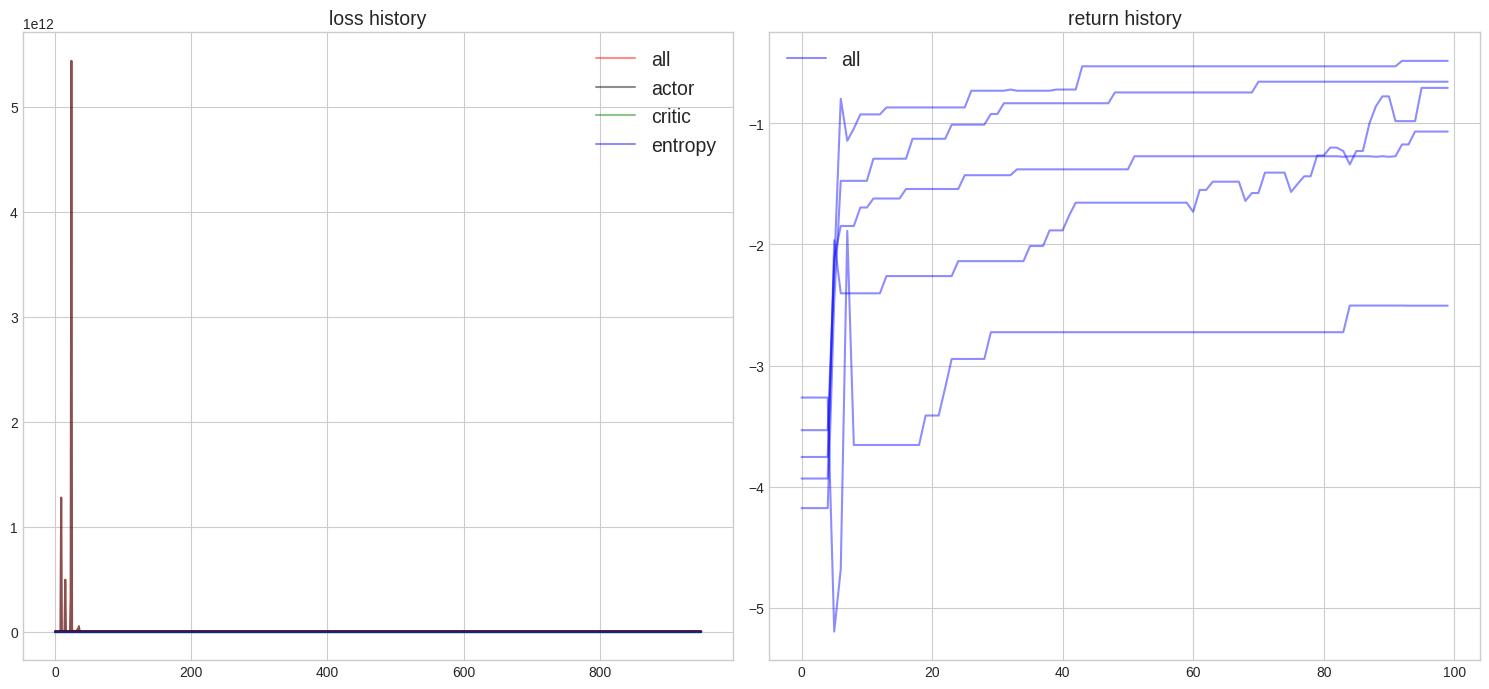

acquired action
action =  [9.847 9.847 9.847 9.847 9.847 9.847 9.847 9.847 9.847 9.847]
action =  [6.305 6.305 6.305 6.305 6.305 6.305 6.305 6.305 6.305 6.305]
action =  [9.47 9.47 9.47 9.47 9.47 9.47 9.47 9.47 9.47 9.47]
action =  [7.797 7.797 7.797 7.797 7.797 7.797 7.797 7.797 7.797 7.797]
action =  [6.44 6.44 6.44 6.44 6.44 6.44 6.44 6.44 6.44 6.44]
action =  [4.72 4.72 4.72 4.72 4.72 4.72 4.72 4.72 4.72 4.72]
action =  [4.253 4.253 4.253 4.253 4.253 4.253 4.253 4.253 4.253 4.253]
action =  [3.621 3.621 3.621 3.621 3.621 3.621 3.621 3.621 3.621 3.621]
action =  [1.795 1.795 1.795 1.795 1.795 1.795 1.795 1.795 1.795 1.795]
action =  [0.94 0.94 0.94 0.94 0.94 0.94 0.94 0.94 0.94 0.94]
return [-0.655 -0.655 -0.655 -0.655 -0.655 -0.655 -0.655 -0.655 -0.655 -0.655]
param distribution in model


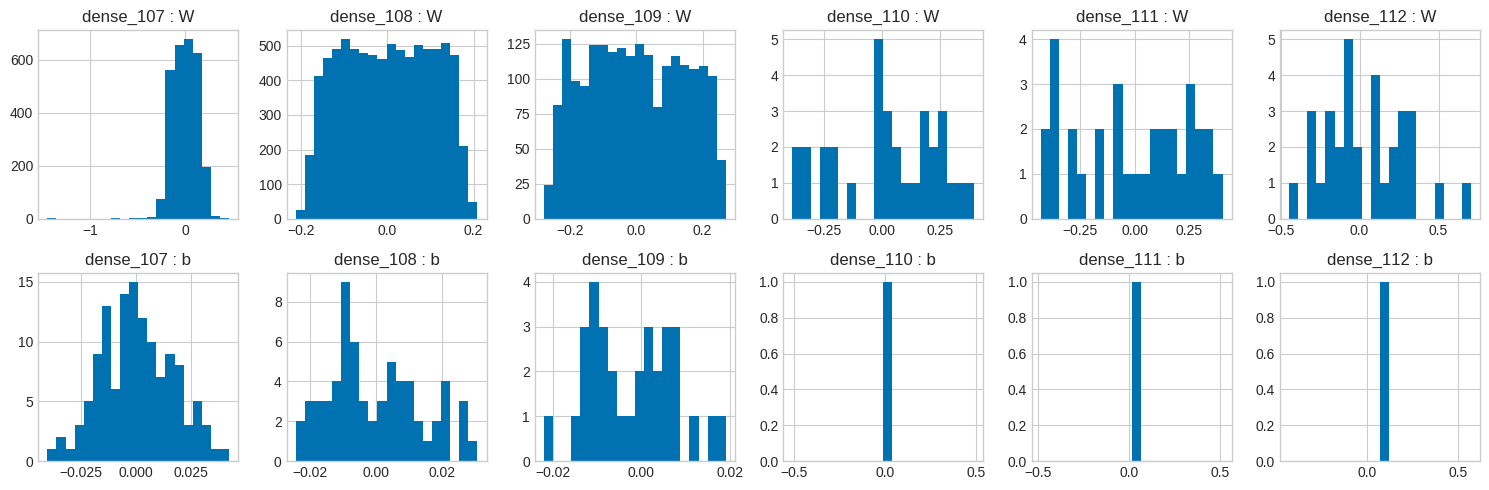

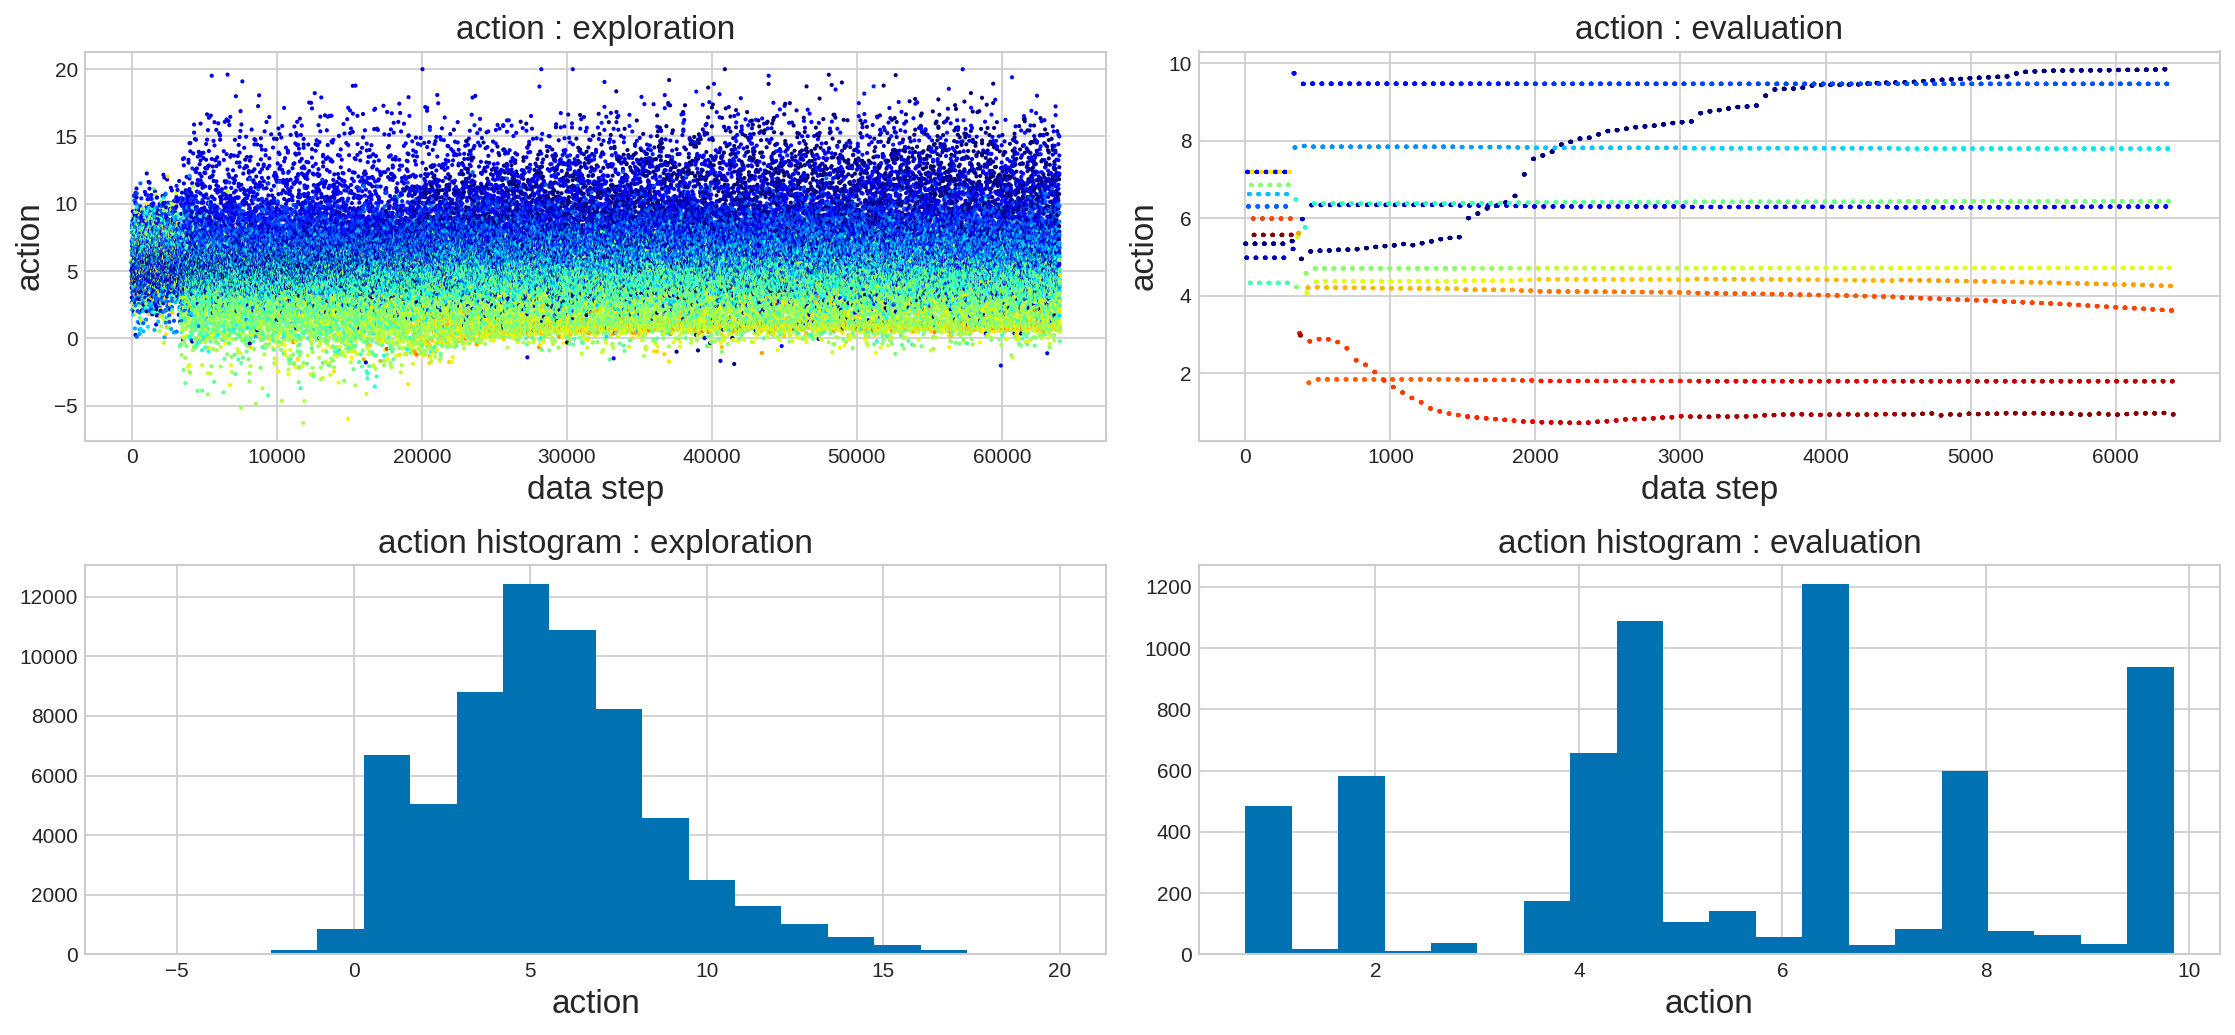

In [11]:
import AWR
importlib.reload(AWR)  # original DRL code

from keras import optimizers

mu_min = mu_min
mu_max = mu_max
sigma_max = (mu_max - mu_min) / 3

model = AWR.gen_model(input_shapes=env.shapes(), n_outputs=1, \
                      hidden_dims=[128, 64, 32], reg_l1=0.0, reg_l2=0.0, \
                      state_reg=False, state_min=-1.0, state_max=1.0,
                      action_reg=True, 
                      action_min=mu_min, action_max=mu_max, 
                      action_sigma_min=0.0001, action_sigma_max=sigma_max, 
                      value_reg=False, value_min=0, value_max=1)

#df = pd.DataFrame()
for lr, mult_critic, mult_entropy in itertools.product(
    [1e-3,], [1.0,], [1e-5,]):
    print('======================================================')
    print('lr={}, mult_critic={}, mult_entropy={}'
          .format(lr, mult_critic, mult_entropy))
    
    tester = AWR.Tester(env, model, 
                        action_min=mu_min-3*sigma_max, 
                        action_max=mu_max+3*sigma_max)
    #n_trials = 1
    #n_steps = 10000
    tester.test(n_trials=n_trials, n_steps=n_steps, 
                training_interval=10, n_batches=10, batch_size=256,
                buf_alpha=0.5, buf_beta=0.5, buf_mode='rank',
                gamma=1.0, 
                optimizer=optimizers.Adam(lr=lr),
                mult_actor=1.0, mult_critic=mult_critic, mult_entropy=mult_entropy, mult_beta=0.1, 
                verbose=False, verbose_interval=100, evaluate_interval=100, 
                get_log=True)

    viz = AWR.Visualizer()
    viz.viz_action_history(tester.trainer, state_valuation=lambda x:x[0], action_valuation=lambda x:x, 
                           cmap='jet', alpha=1.0, s=1.0)

    for trial in range(n_trials):
        df_temp = pd.DataFrame(np.ravel(tester.return_histories[trial]['all']), columns=['return'])
        df_temp['trial'] = trial
        df_temp['t'] = np.arange(len(df_temp))
        #df_temp['lr'] = lr
        #df_temp['mult_critic'] = mult_critic
        #df_temp['mult_entropy'] = mult_entropy
        df_temp['Agent'] = 'AWR'

        df = pd.concat([df, df_temp])

    #ModelInspection.inspect_hidden_layers(tester.env, tester.model, tester.agent, show_hidden_hist=True)

df.to_csv(tester.name + '.csv')

In [12]:
env = Env_DM.Environment(yield_curve, liability_CF, n_agents=1, reset_cash=False)

  0%|          | 0/1000 [00:00<?, ?it/s]

lr=0.01, eps=0.01
start testing... :  2019-10-29 10:29:05.994613
start trial 0/5 trial...


  0%|          | 0/1000 [00:00<?, ?it/s]

start trial 1/5 trial...


  0%|          | 0/1000 [00:00<?, ?it/s]

start trial 2/5 trial...


  0%|          | 0/1000 [00:00<?, ?it/s]

start trial 3/5 trial...


  0%|          | 0/1000 [00:00<?, ?it/s]

start trial 4/5 trial...


100%|██████████| 1000/1000 [23:59<00:00,  1.46s/it]


end testing... :  2019-10-29 12:29:51.762079
loss and reward history


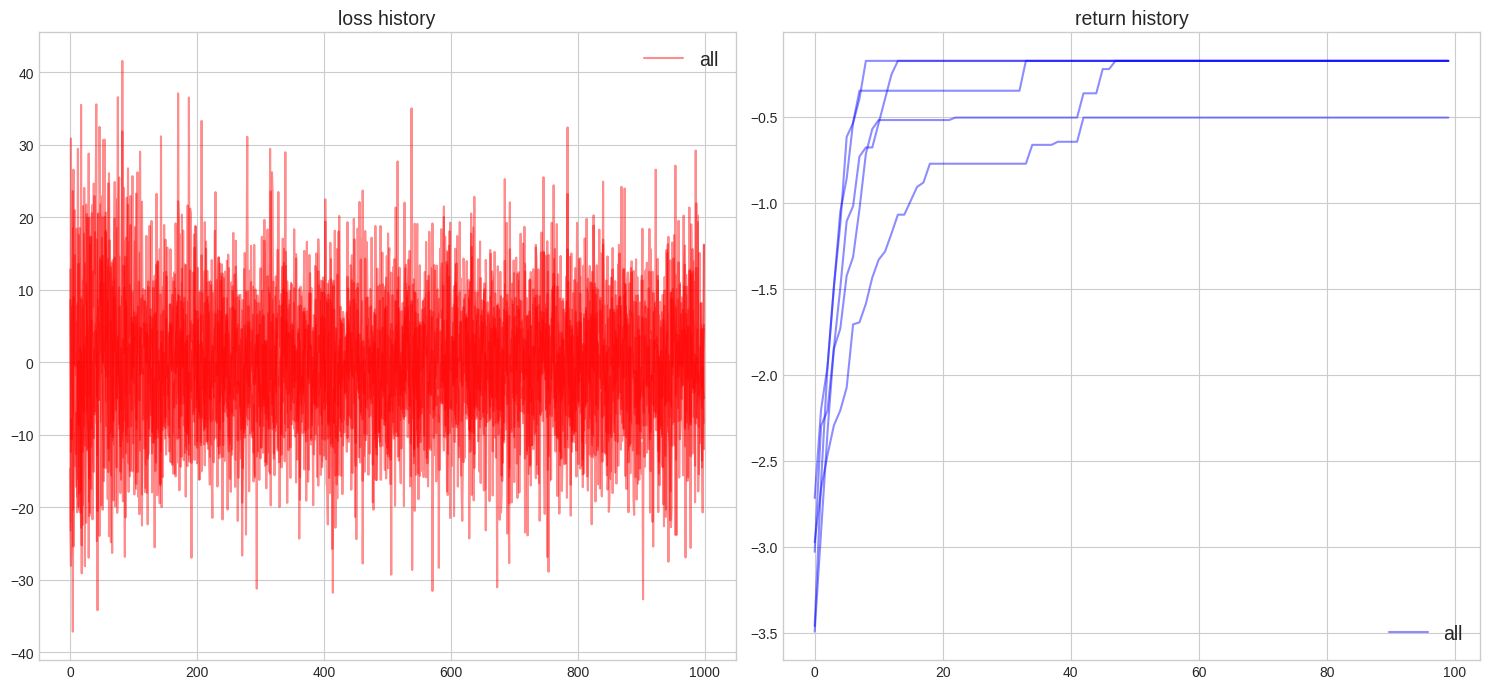

acquired action
action =  [7.905]
action =  [8.06]
action =  [8.018]
action =  [8.027]
action =  [6.039]
action =  [5.066]
action =  [4.049]
action =  [2.947]
action =  [1.982]
action =  [1.06]
total_reward [-0.504]
param distribution in model


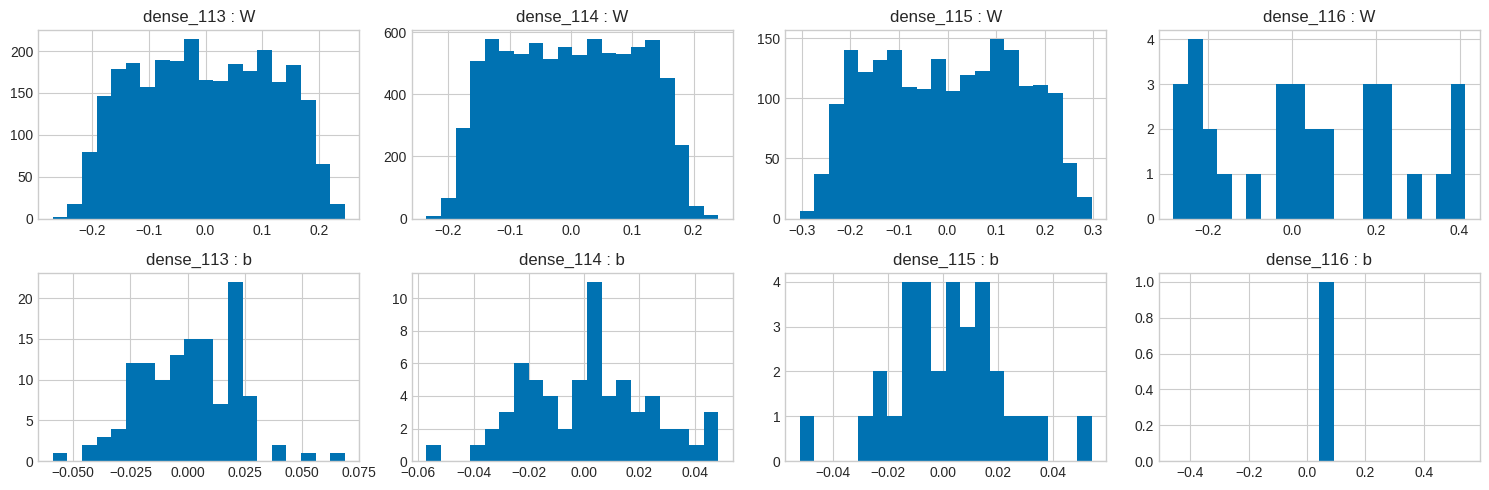

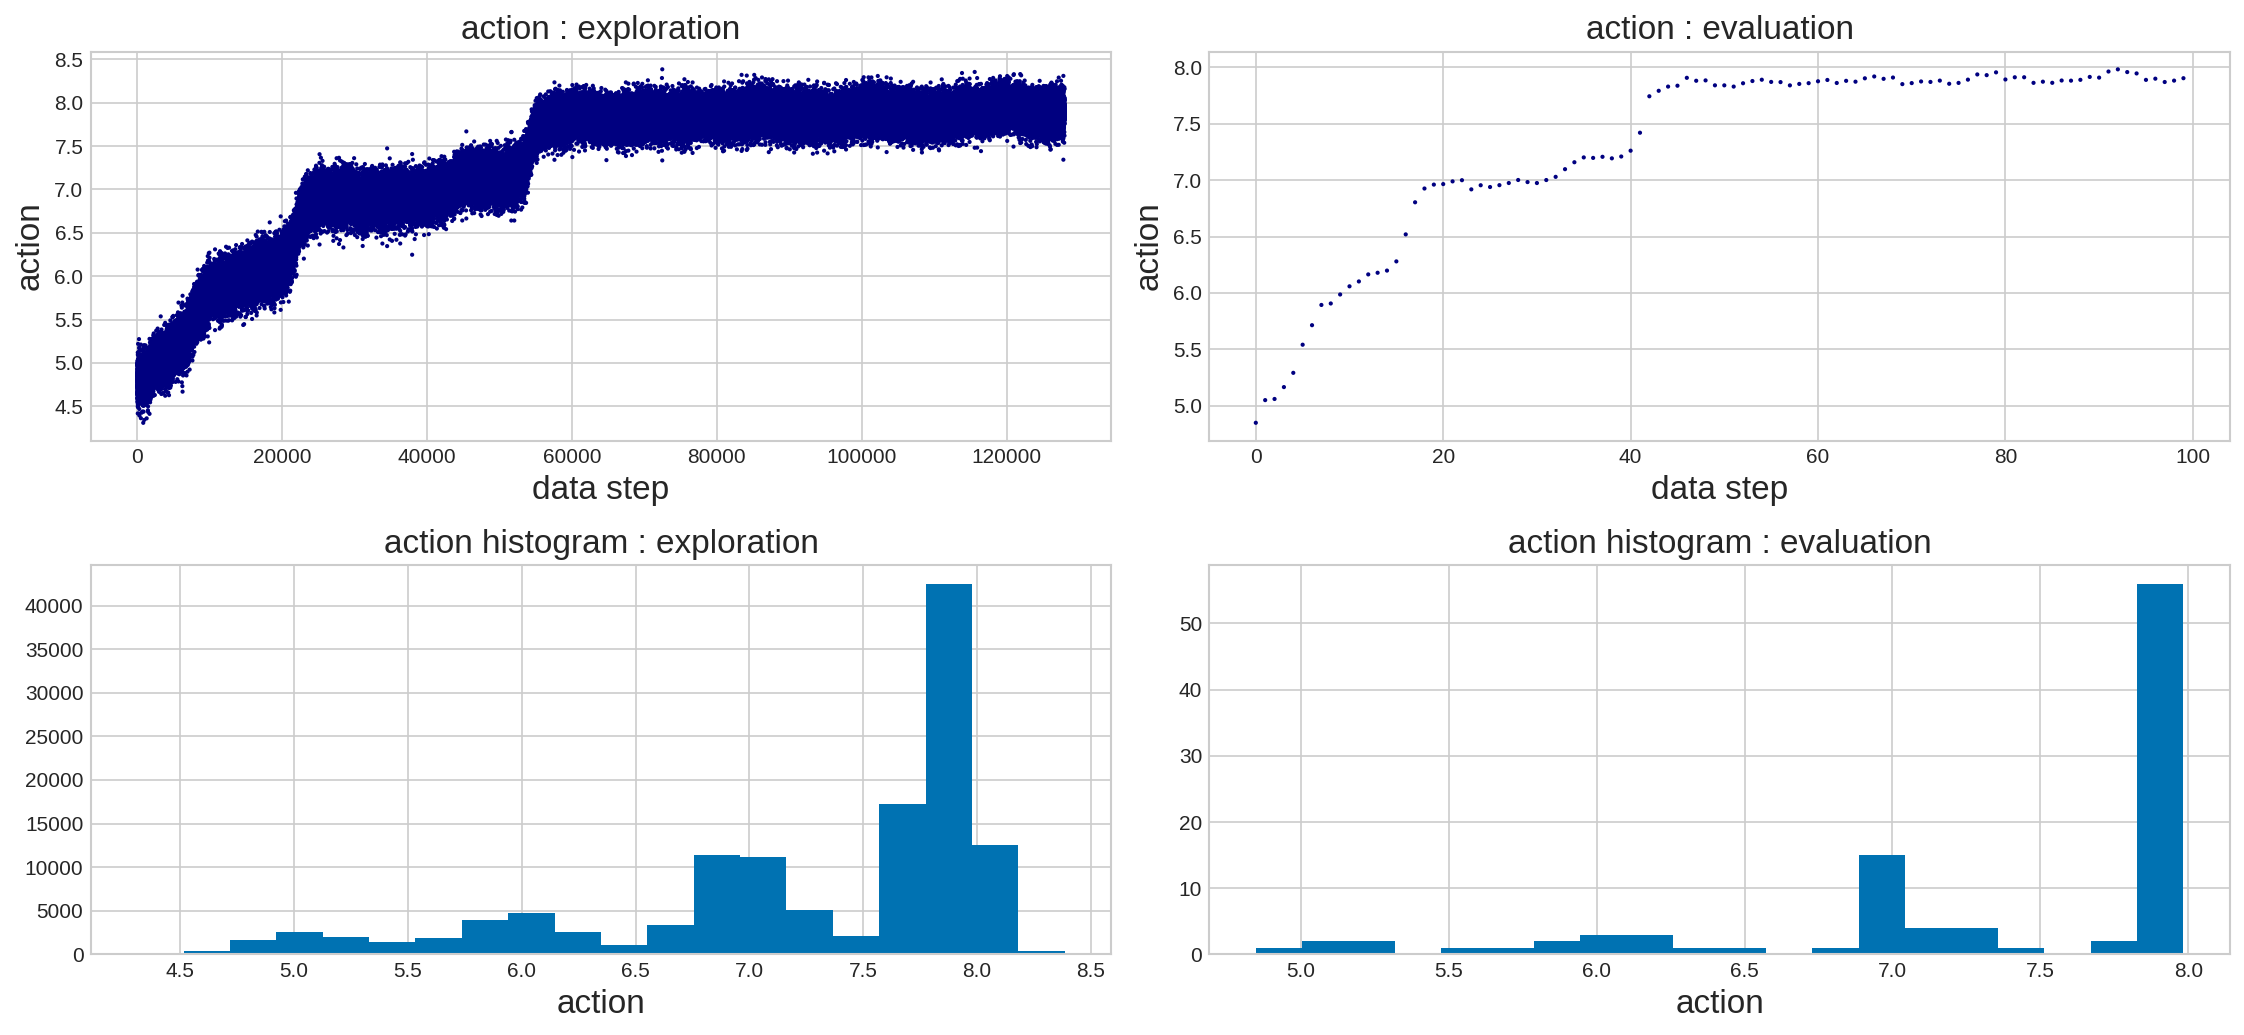

In [13]:
import ES
importlib.reload(ES)
from keras import optimizers

action_min = mu_min
action_max = mu_max

model = ES.gen_model(input_shapes=env.shapes(), n_outputs=1, \
                     hidden_dims=[128, 64, 32], reg_l1=0.0, reg_l2=0.0, \
                     action_min=action_min, action_max=action_max)

#df = pd.DataFrame()
for lr, eps in itertools.product([1e-2], [1e-2]):
    print('======================================================')
    print('lr={}, eps={}'
          .format(lr, eps))
    tester = ES.Tester(env, model, name='ES_01')
    #n_trials = 3
    #n_steps = 10000
    tester.test(n_trials=n_trials, n_episodes=n_steps // 10, n_samples=64,
                gamma=1.0,
                learning_rate_start=lr, learning_rate_end=lr, learning_rate_interval=100,
                epsilon_start=eps, epsilon_end=eps, epsilon_interval=100,
                verbose=False, verbose_interval=100//10, evaluate_interval=100//10, 
                get_log=True)
    
    viz = ES.Visualizer()
    viz.viz_action_history(tester.trainer, state_valuation=lambda x:x[0], action_valuation=lambda x:x,
                       data_span=10,
                       cmap='jet', alpha=1.0, s=1.0)
    
    for trial in range(n_trials):
        df_temp = pd.DataFrame(np.ravel(tester.return_histories[trial]['all']), columns=['return'])
        df_temp['trial'] = trial
        df_temp['t'] = np.arange(len(df_temp))
        #df_temp['lr'] = lr
        #df_temp['eps'] = eps
        df_temp['Agent'] = 'ES'

        df = pd.concat([df, df_temp])

    #ModelInspection.inspect_hidden_layers(tester.env, tester.model, tester.agent, show_hidden_hist=True)

df.to_csv(tester.name + '.csv')

er=0.5, eps=0.01
start testing... :  2019-10-29 12:29:56.773375
start trial 0/5 trial...


100%|██████████| 1000/1000 [23:59<00:00,  1.47s/it]


start trial 1/5 trial...


100%|██████████| 1000/1000 [24:03<00:00,  1.44s/it]


start trial 2/5 trial...


100%|██████████| 1000/1000 [24:08<00:00,  1.43s/it]


start trial 3/5 trial...


100%|██████████| 1000/1000 [24:10<00:00,  1.43s/it]


start trial 4/5 trial...


100%|██████████| 1000/1000 [24:16<00:00,  1.45s/it]


end testing... :  2019-10-29 14:31:44.608594
loss and reward history


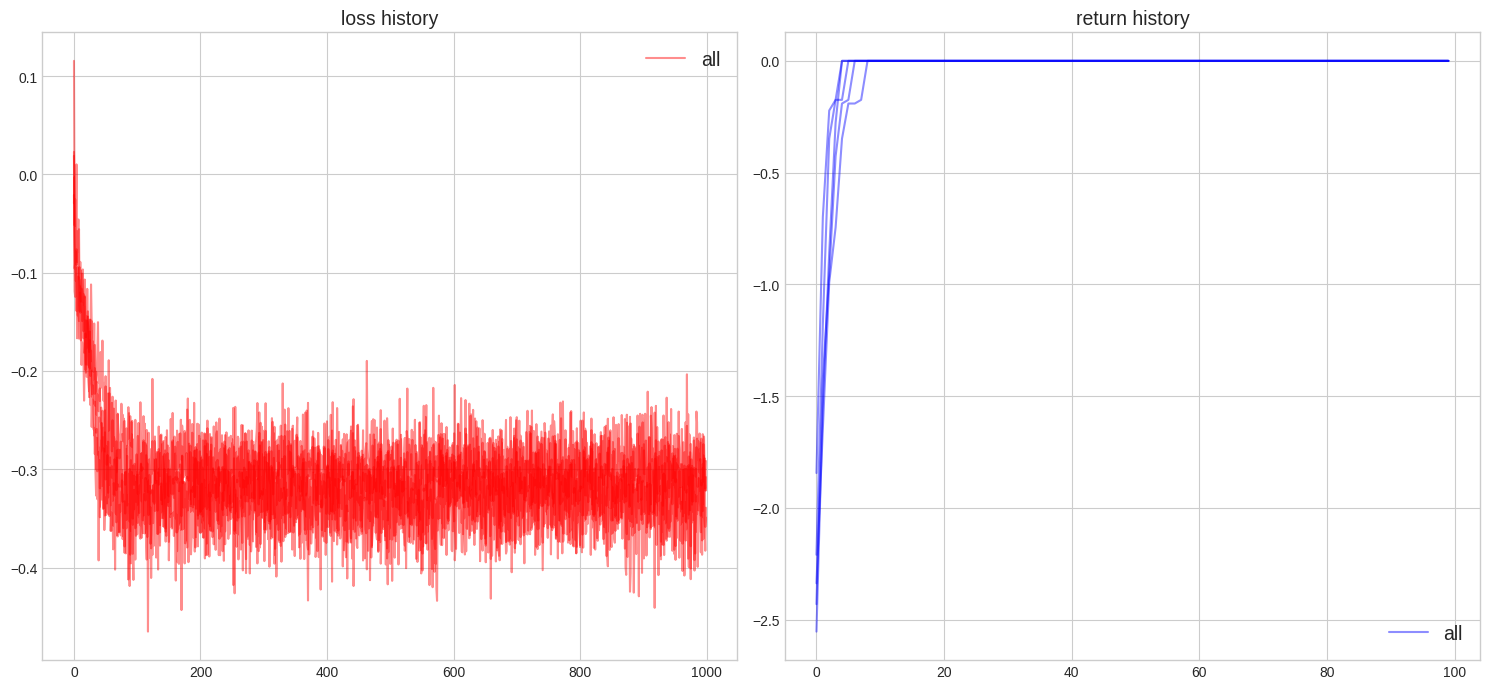

acquired action
action =  [9.609]
action =  [9.177]
action =  [7.74]
action =  [6.984]
action =  [5.897]
action =  [4.777]
action =  [3.917]
action =  [2.609]
action =  [1.932]
action =  [0.653]
total_reward [-2.487e-14]
param distribution in model


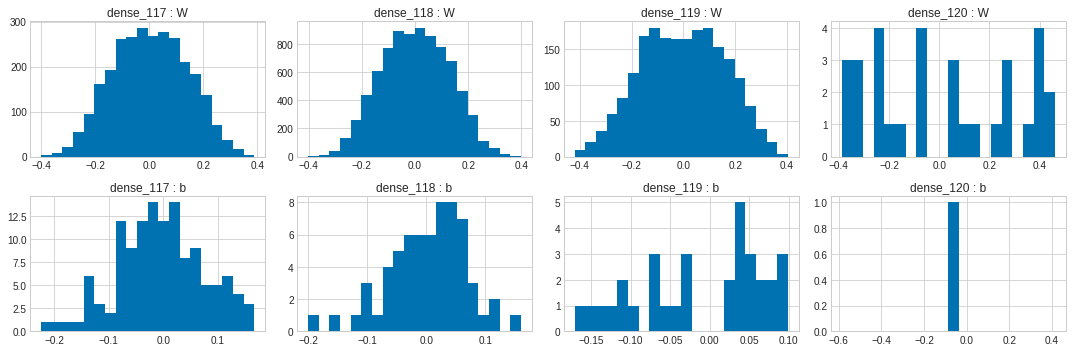

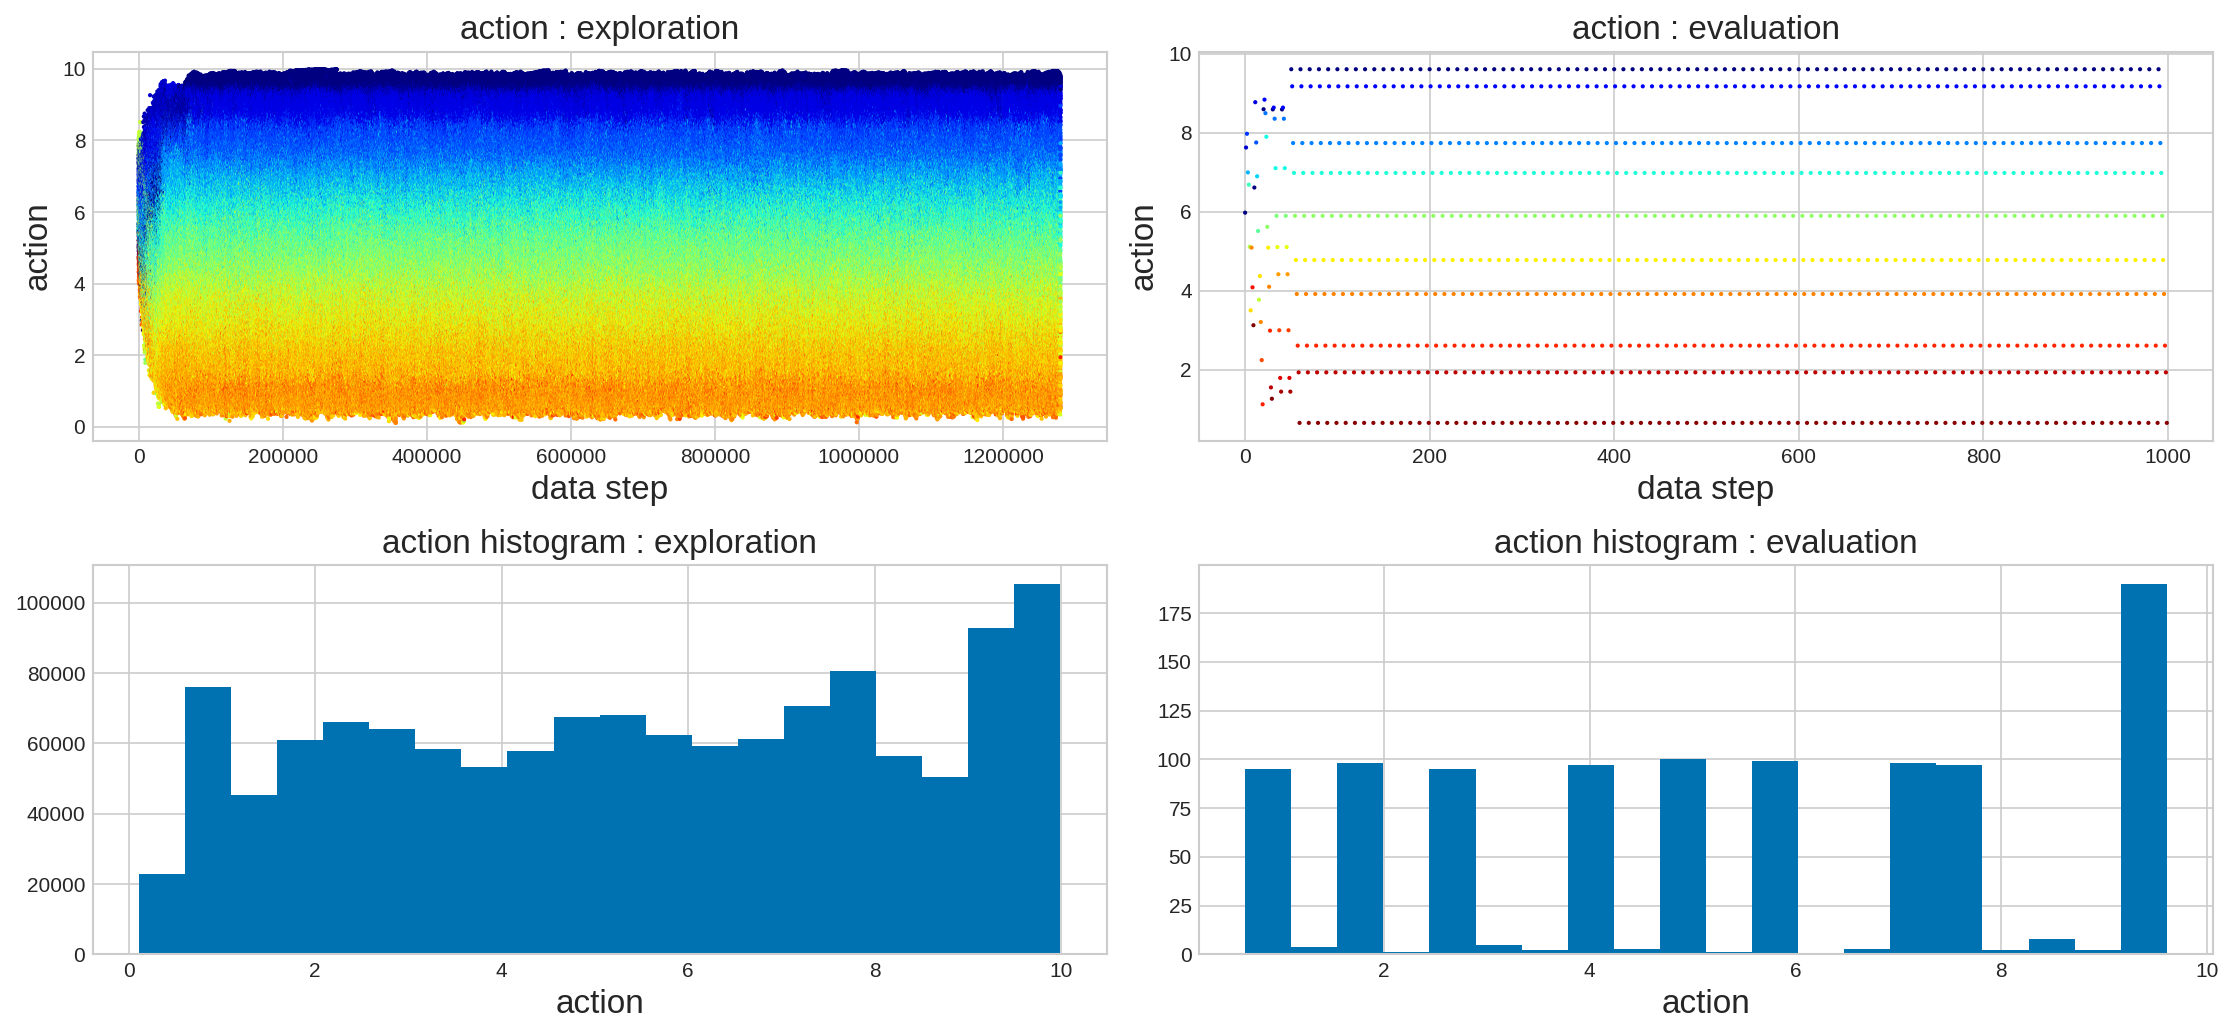

In [14]:
import GA
importlib.reload(GA)
from keras import optimizers

action_min = mu_min
action_max = mu_max

model = GA.gen_model(input_shapes=env.shapes(), n_outputs=1, \
                     hidden_dims=[128, 64, 32], reg_l1=0.0, reg_l2=0.0, \
                     action_min=action_min, action_max=action_max)

#df = pd.DataFrame()
for er, eps in itertools.product([0.5], [1e-2]):
    print('======================================================')
    print('er={}, eps={}'
          .format(er, eps))
    tester = GA.Tester(env, model, name='GA_01')
    #n_trials = 3
    #n_steps = 10000
    tester.test(n_trials=n_trials, n_episodes=n_steps // 10, 
                n_samples=64, ratio_elite=er, 
                gamma=1.0,
                epsilon_start=eps, epsilon_end=eps, epsilon_interval=100,
                verbose=False, verbose_interval=100//10, evaluate_interval=100//10, 
                get_log=True)
    
    viz = GA.Visualizer()
    viz.viz_action_history(tester.trainer, state_valuation=lambda x:x[0], action_valuation=lambda x:x,
                       data_span=1,
                       cmap='jet', alpha=1.0, s=1.0)
    
    for trial in range(n_trials):
        df_temp = pd.DataFrame(np.ravel(tester.return_histories[trial]['all']), columns=['return'])
        df_temp['trial'] = trial
        df_temp['t'] = np.arange(len(df_temp))
        #df_temp['er'] = er
        #df_temp['eps'] = eps
        df_temp['Agent'] = 'GA'

        df = pd.concat([df, df_temp])

    #ModelInspection.inspect_hidden_layers(tester.env, tester.model, tester.agent, show_hidden_hist=True)

df.to_csv(tester.name + '.csv')

---
## 3. Results

In [15]:
pd.options.display.precision = 4
ids = ['Agent',]
df[df['t'].max()*0.9<=df['t']].groupby(ids)['return'].describe()

count        mean     std         min         25%         50%  \
Agent                                                                           
A2C_continuous   50.0 -6.0744e-01  0.0771 -7.0223e-01 -6.3809e-01 -6.3809e-01   
A2C_discrete     50.0 -2.4869e-14  0.0000 -2.4869e-14 -2.4869e-14 -2.4869e-14   
AWR              50.0 -1.1208e+00  0.7344 -2.5055e+00 -1.1734e+00 -7.4105e-01   
DDPG             50.0 -2.4869e-14  0.0000 -2.4869e-14 -2.4869e-14 -2.4869e-14   
DQN              50.0 -2.4869e-14  0.0000 -2.4869e-14 -2.4869e-14 -2.4869e-14   
ES               50.0 -2.4036e-01  0.1333 -5.0428e-01 -1.7438e-01 -1.7438e-01   
GA               50.0 -2.4869e-14  0.0000 -2.4869e-14 -2.4869e-14 -2.4869e-14   
NAF              50.0 -2.6452e+00  0.3977 -3.4591e+00 -3.0209e+00 -2.5378e+00   

                       75%         max  
Agent                                   
A2C_continuous -6.2899e-01 -4.5604e-01  
A2C_discrete   -2.4869e-14 -2.4869e-14  
AWR            -6.5494e-01 -4.8277e-01  
DDPG           -2.4869e-14 -2.4869e-14  
DQN            -2.4869e-14 -2.4869e-14  
ES             -1.7438e-01 -1.7438e-01  
GA             -2.4869e-14 -2.4869e-14  
NAF            -2.2918e+00 -2.0645e+00

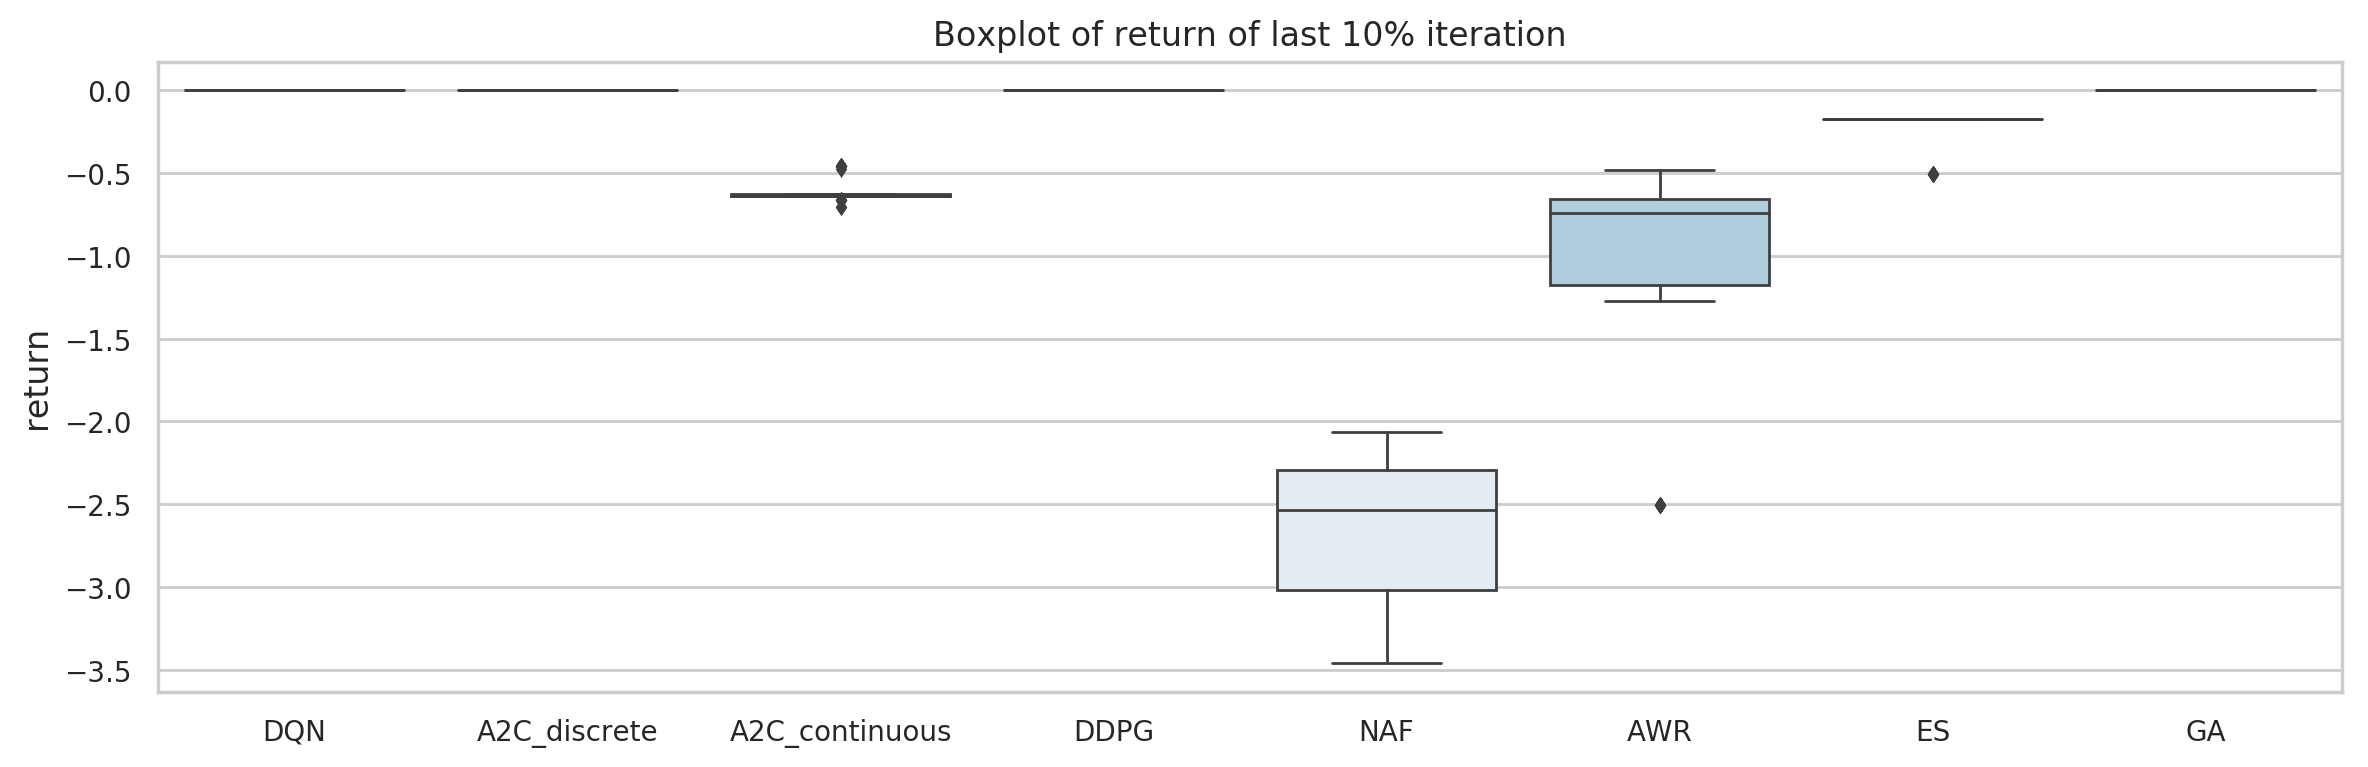

In [16]:
sns.set_style("whitegrid")
sns.set_context("notebook")

plt.figure(figsize=(12, 4), dpi=200)

sns.boxplot(data=df[df['t'].max()*0.9<=df['t']], x='Agent', y='return', orient='v', fliersize=3.0, linewidth=1.0, palette='RdBu')

plt.title('Boxplot of return of last 10% iteration', fontsize=12)
plt.xlabel('', fontsize=12)
plt.ylabel('return', fontsize=12)
plt.tick_params(labelsize=10)

plt.tight_layout()
plt.show()

/home/deepstation/.pyenv/versions/anaconda3-5.0.1/envs/ForChainer/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


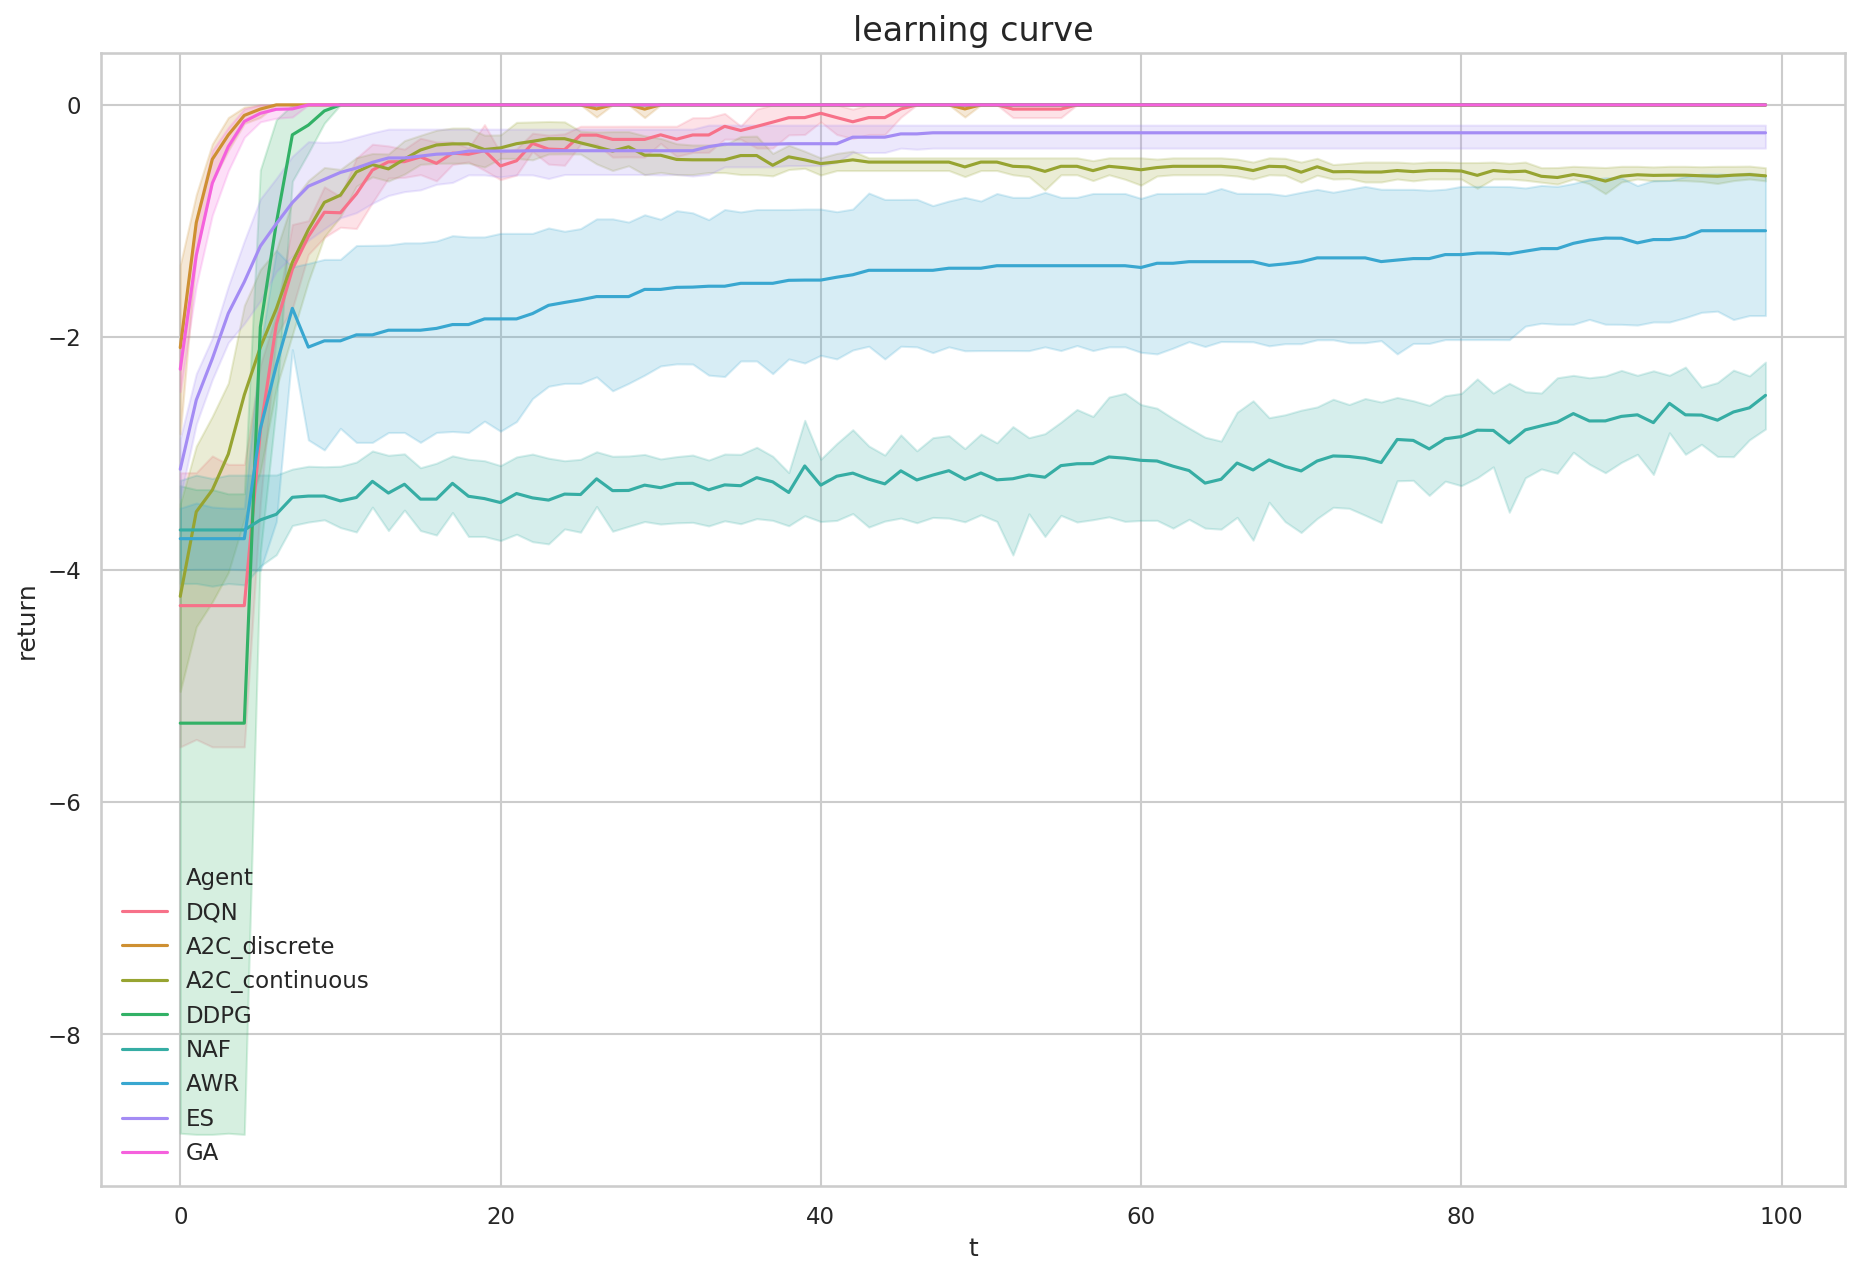

In [17]:
fig = plt.figure(figsize=(15, 10), dpi=150)
sns.lineplot(x='t', y='return', hue='Agent', data=df)
plt.title('learning curve', size=16)
plt.show()